# Assignment 2: Predictive Modelling

This assignment focuses on uses predictive analytics on the datasets prepared as they were following assignment 1 to create models to predict future house price values based on the available statistics in the dataset. This begins with some initial exploratory analysis to find any features that may be promising in terms of its relationship with the target price feature while also exploring if there are any composite features or new features that might add value to predictive models that could be extrapolated from the current dataset. Following this, multiple models will be trained on the data to find a model that is most predictive of the target feature and discuss these findings as they occur.

## Part 0.A: Importing Necessary Modules

In [104]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn>=1.0.1 in c:\users\foste\anaconda3\lib\site-packages (from imbalanced-learn) (1.0.2)



In [105]:
pip install smogn

Note: you may need to restart the kernel to use updated packages.


In [106]:
# Import necessary modules

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from geopy.geocoders import Nominatim
from matplotlib.backends.backend_pdf import PdfPages
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import imblearn
import seaborn as sns
import smogn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Part 0.B: Initial DataFrame Check

Before proceeding with splitting the data and any exploratory analysis, it was decided to first check that the dataset was in 'good working order' and essentially that any known errors from the data cleaning stage of assignment 1 had been attended to fully during data cleaning.

In [107]:
df = pd.read_csv('ppr-14332591-clean.csv', keep_default_na = True, delimiter=',', skipinitialspace = True)

In [108]:
df.head()

,Unnamed: 0,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property
0,0,2016,Dublin,1,"Malahide, Fingal, County Dublin, Leinster, K36...",Yes,Dublin,260000.000,No,Second-Hand Dwelling house /Apartment
1,1,2013,Dublin 1,3,"Parnell Street, Rotunda B ED, Dublin, Dublin 1...",Yes,Dublin,81000.000,No,Second-Hand Dwelling house /Apartment
2,2,2011,Leitrim,1,"Ballinamore, Ballinamore Municipal District, C...",No,Leitrim,155000.000,No,Second-Hand Dwelling house /Apartment
3,3,2016,Galway,10,"Murrough Avenue, Murrough, Cathair na Gaillimh...",Yes,Galway,60000.000,No,Second-Hand Dwelling house /Apartment
4,4,2014,Kildare,8,"Newbridge, The Municipal District of Kildare —...",No,Kildare,314999.955,No,New Dwelling house /Apartment


In [109]:
# Drop the index column that was carried in with the csv read

df.drop(df.columns[[0]], axis=1, inplace=True)
df

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property
0,2016,Dublin,1,"Malahide, Fingal, County Dublin, Leinster, K36...",Yes,Dublin,260000.000,No,Second-Hand Dwelling house /Apartment
1,2013,Dublin 1,3,"Parnell Street, Rotunda B ED, Dublin, Dublin 1...",Yes,Dublin,81000.000,No,Second-Hand Dwelling house /Apartment
2,2011,Leitrim,1,"Ballinamore, Ballinamore Municipal District, C...",No,Leitrim,155000.000,No,Second-Hand Dwelling house /Apartment
3,2016,Galway,10,"Murrough Avenue, Murrough, Cathair na Gaillimh...",Yes,Galway,60000.000,No,Second-Hand Dwelling house /Apartment
4,2014,Kildare,8,"Newbridge, The Municipal District of Kildare —...",No,Kildare,314999.955,No,New Dwelling house /Apartment
...,...,...,...,...,...,...,...,...,...
9995,2021,Mayo,10,"Castlebar, Castlebar Municipal District, Count...",Yes,Mayo,72000.000,Yes,Second-Hand Dwelling house /Apartment
9996,2021,Leitrim,12,"Ballinamore, Ballinamore Municipal District, C...",No,Leitrim,112000.000,No,Second-Hand Dwelling house /Apartment
9997,2016,Waterford,8,"Finisterre Lawn, Landsend, Abbeyside, Dungarva...",Yes,Waterford,60000.000,No,Second-Hand Dwelling house /Apartment
9998,2021,Limerick,11,"Kilmallock, The Municipal District of Cappamor...",Yes,Limerick,80000.000,No,Second-Hand Dwelling house /Apartment


In [110]:
df.dtypes

Year_of_Sale                 int64
Post_Code_or_County         object
Month_of_Sale                int64
Address                     object
Major_Train_Route           object
County                      object
Price                      float64
Not_Full_Market_Price       object
Description_of_Property     object
dtype: object

In [111]:
# Change categorical 'object' types to 'category'

df['Post_Code_or_County'] = df['Post_Code_or_County'].astype('category')
df['Address'] = df['Address'].astype('category')
df['Major_Train_Route'] = df['Major_Train_Route'].astype('category')
df['County'] = df['County'].astype('category')
df['Not_Full_Market_Price'] = df['Not_Full_Market_Price'].astype('category')
df['Description_of_Property'] = df['Description_of_Property'].astype('category')

In [112]:
df.dtypes

Year_of_Sale                  int64
Post_Code_or_County        category
Month_of_Sale                 int64
Address                    category
Major_Train_Route          category
County                     category
Price                       float64
Not_Full_Market_Price      category
Description_of_Property    category
dtype: object

One of the known errors from the first stage of data cleaning had been a discrepancy / error in the coding of the post code or county value and so these values were checked against the county values for the dataset to double-check that the same error was not present still before proceeding.

In [113]:
df['County'].value_counts()

Dublin       3190
Cork         1058
Kildare       543
Galway        517
Meath         381
Limerick      373
Wexford       361
Kerry         313
Wicklow       304
Donegal       298
Waterford     268
Louth         268
Tipperary     259
Mayo          233
Clare         208
Westmeath     194
Sligo         163
Cavan         158
Laois         156
Kilkenny      142
Offaly        140
Roscommon     139
Longford       91
Carlow         90
Leitrim        86
Monaghan       67
Name: County, dtype: int64

In [114]:
df['Post_Code_or_County'].value_counts()

Dublin       1277
Cork         1058
Kildare       543
Galway        517
Meath         381
Limerick      373
Wexford       361
Kerry         313
Wicklow       304
Donegal       298
Waterford     268
Louth         267
Tipperary     259
Dublin 15     249
Mayo          233
Clare         208
Westmeath     194
Sligo         163
Cavan         158
Laois         156
Dublin 18     151
Kilkenny      142
Offaly        140
Roscommon     139
Dublin 7      126
Dublin 24     122
Dublin 11     117
Dublin 14     105
Dublin 13     102
Dublin 9      101
Dublin 4      100
Dublin 8       94
Longford       91
Carlow         90
Dublin 6       88
Leitrim        86
Dublin 3       84
Dublin 16      84
Dublin 5       83
Dublin 12      77
Monaghan       67
Dublin 22      63
Dublin 1       45
Dublin 2       39
Dublin 10      38
Dublin 17      18
Dublin 20      15
Dublin 6w      13
Name: Post_Code_or_County, dtype: int64

Upon examining the value counts for both the County and Post_Code_or_County features, it was noticed that the values did not match for the county Louth. This was a known error in the dataset from the first data cleaning operation on this dataset, so it was decided to use the intact address in this instance to check what the correct post code value should be in the instance where these values did not match up and adjust it accordingly.

In [115]:
df_Louth = df[['County', 'Address', 'Post_Code_or_County']][df['County'] == 'Louth']
df_Louth

,County,Address,Post_Code_or_County
46,Louth,"Drogheda, The Borough District of Drogheda, Co...",Louth
63,Louth,"County Louth, Leinster, Éire / Ireland",Louth
110,Louth,"County Louth, Leinster, Éire / Ireland",Louth
114,Louth,"Dundalk, The Municipal District of Dundalk, Co...",Louth
132,Louth,"Termonfeckin, The Borough District of Drogheda...",Louth
...,...,...,...
9858,Louth,"Dundalk, The Municipal District of Dundalk, Co...",Louth
9880,Louth,"County Louth, Leinster, Éire / Ireland",Louth
9899,Louth,"County Louth, Leinster, Éire / Ireland",Louth
9917,Louth,"County Louth, Leinster, Éire / Ireland",Louth


In [116]:
# Locate the row with the incorrect post code or county value

df_Louth.loc[df['Post_Code_or_County'] != 'Louth']

,County,Address,Post_Code_or_County
4696,Louth,"Ardee, The Municipal District of Ardee, County...",Dublin 13


In [117]:
# Double-check the address to see if the house belongs to County Louth or County Dublin

df.loc[4696]['Address']

'Ardee, The Municipal District of Ardee, County Louth, Leinster, A92 H006, Éire / Ireland'

In [118]:
# Correct post code or county value to Louth based on above address

df.at[4696, 'Post_Code_or_County'] = 'Louth'

## Part 1: Exploratory Analysis

The first step in this exploratory analysis was to create training and testing splits for the dataframe currently in use. Thankfully, sk-learn has a function train_test_split() that can explicitly randomly shuffle a dataframe and create training and testing splits on a dataset. As specified, this training and testing split split the data 70-30 in terms of number of rows and the random_state parameter was set to 42 in order to keep the same randomisation for any further splitting of data should that be deemed necessary (this number was selected as it is the example in the sk-learn docs and thus would make it easier to remember for future use - see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html for demonstration.)

In [119]:
# Creating training and test split in the data

df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 42, shuffle = True)

In [120]:
df_train

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment
...,...,...,...,...,...,...,...,...,...
5734,2019,Kildare,5,"County Kildare, Leinster, Éire / Ireland",No,Kildare,365000.0,No,Second-Hand Dwelling house /Apartment
5191,2018,Offaly,5,"County Offaly, Leinster, Éire / Ireland",No,Offaly,240000.0,No,Second-Hand Dwelling house /Apartment
5390,2020,Clare,12,"Newmarket on Fergus, Shannon Municipal Distric...",No,Clare,67500.0,No,Second-Hand Dwelling house /Apartment
860,2020,Cork,11,"Cork, County Cork, Munster, T12 T997, Éire / I...",Yes,Cork,145000.0,No,Second-Hand Dwelling house /Apartment


In [121]:
df_test

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property
6252,2014,Kildare,3,"Clane, The Municipal District of Clane — Mayno...",No,Kildare,232000.000,No,Second-Hand Dwelling house /Apartment
4684,2013,Waterford,9,"Clonmel, The Borough District of Clonmel, Coun...",Yes,Waterford,202500.000,No,Second-Hand Dwelling house /Apartment
1731,2021,Dublin 15,8,"Dublin 15, Leinster, Éire / Ireland",Yes,Dublin,380000.000,No,Second-Hand Dwelling house /Apartment
4742,2018,Cork,8,"Cork, County Cork, Munster, T12 T997, Éire / I...",Yes,Cork,425000.000,No,Second-Hand Dwelling house /Apartment
4521,2013,Kerry,8,"Kilgarvan, Kenmare Municipal District, County ...",Yes,Kerry,44000.000,Yes,Second-Hand Dwelling house /Apartment
...,...,...,...,...,...,...,...,...,...
8014,2019,Dublin 13,6,"Dublin, Dublin 1, Leinster, Éire / Ireland",Yes,Dublin,648764.865,No,New Dwelling house /Apartment
1074,2021,Dublin 14,8,"Dublin 14, Leinster, Éire / Ireland",Yes,Dublin,530000.000,No,Second-Hand Dwelling house /Apartment
3063,2020,Mayo,12,"Ballina, Ballina Municipal District, County Ma...",Yes,Mayo,180000.000,No,Second-Hand Dwelling house /Apartment
6487,2019,Dublin 15,1,"Castleknock, Fingal, County Dublin, Leinster, ...",Yes,Dublin,698999.965,No,New Dwelling house /Apartment


Having confirmed that both the training and test sets had been created with random shuffling, it was then time to create copies of these sets but with clamped data for the target feature price, which had significant outliers in the first step of data cleaning during Assignment 1. The original dataframes with unclamped data were still kept to train different models with and without clamped outliers to assess their effect on model performance as per the recommendation of Kelleher, Mac Namee and D'Arcy (2020). Their described method of using clamps of 1.5 * the interquartile range on either side of the first and third quartile values as clamps were also applied as this solution could be applied to data without a normal distribution. 

In [122]:
# Descriptive statistics for continuous features in original complete dataframe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Sale,10000.0,2016.551500,3.136962,2010.0,2014.0,2017.0,2019.0,2.022000e+03
Month_of_Sale,10000.0,6.882200,3.507271,1.0,4.0,7.0,10.0,1.200000e+01
Price,10000.0,259725.890737,336004.422183,5280.0,120000.0,205000.0,320000.0,1.851000e+07


Looking at the descriptive statistics for the price value in particular we can see that the difference between the minimum and the 1st quartile values is approximately 105,000 while the difference between the max and the third quartile value is approximately 1,500,000. Thie standard deviation for this value is also over 336,000 which is larger than the third quartile itself.

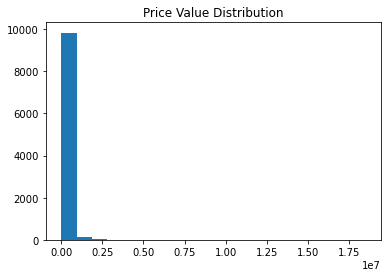

In [123]:
# Distribution histogram for the price feature in the original dataframe

plt.hist(df['Price'], bins = 20)
plt.title("Price Value Distribution")
plt.show()

Finally, plotting a histogram for the original price data shows clearly that the values are not normally distributed and so clamping the price based on the interquartile range is a superior method to use than clamping based on the standard deviation, another option described by Kelleher, Mac Namee and D'Arcy (2020).

In [124]:
# Create deep copies of both the training and testing splits

df_train_clamped, df_test_clamped = df_train.copy(), df_test.copy()

In [125]:
# Use the percentile function in numpy to create values for 75th and 25th percentiles of price respectively
# Percentiles then used to calculate inter-quartile range

Quartile3, Quartile1 = np.percentile(df['Price'], [75, 25])
iqr = Quartile3 - Quartile1
iqr

200000.0

In [126]:
# Values clamped at 1.5 * IQR either side - store this value in variable

clamping_modifier = iqr*1.5
clamping_modifier

300000.0

In [127]:
# Values only needed clamping for values beyond third quartile as no outliers for low prices in this dataframe

prices = df['Price']
adjusted_prices = []
for price in prices:
    if price > Quartile3 + clamping_modifier:
        price = Quartile3 + clamping_modifier
    adjusted_prices.append(price)

In [128]:
# Double-check that there are no prices still exceeding the clamping limit

for price in adjusted_prices:
    if price > Quartile3 + clamping_modifier:
        print(price)

In [129]:
# Repopulate the price feature with the newly clamped prices

df['Price'] = adjusted_prices

In [130]:
# Check there are no values greater than the upper bounds of the clamping in the price feature still

max(df['Price'])

620000.0

In [131]:
# Descriptive statistics for the continuous features in the dataframe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Sale,10000.0,2016.551500,3.136962,2010.0,2014.0,2017.0,2019.0,2022.0
Month_of_Sale,10000.0,6.882200,3.507271,1.0,4.0,7.0,10.0,12.0
Price,10000.0,236875.916868,155090.531185,5280.0,120000.0,205000.0,320000.0,620000.0


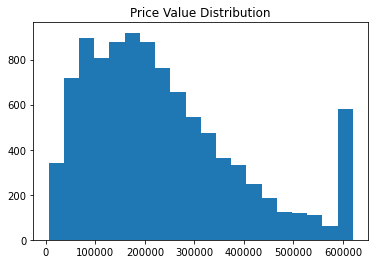

In [132]:
# Distribution histogram for the now clamped price feature in the dataframe

plt.hist(df['Price'], bins = 20)
plt.title("Price Value Distribution")
plt.show()

Now that the clamping had been done and had been shown to improve the quality of the data within the original dataframe, this clamping was then applied to the training and testing datasets for clamped data to compare the effect of this on predictive modelling later.

In [133]:
# Method used to clamp prices in main dataframe now copied to the training split designated as clamped

training_prices = df_train_clamped['Price']
adjusted_training_prices = []
for price in training_prices:
    if price > Quartile3 + clamping_modifier:
        price = Quartile3 + clamping_modifier
    adjusted_training_prices.append(price)
df_train_clamped['Price'] = adjusted_training_prices

In [134]:
# Method used to clamp prices in main dataframe now copied to the test split designated as clamped

testing_prices = df_test_clamped['Price']
adjusted_testing_prices = []
for price in testing_prices:
    if price > Quartile3 + clamping_modifier:
        price = Quartile3 + clamping_modifier
    adjusted_testing_prices.append(price)
df_test_clamped['Price'] = adjusted_testing_prices

Descriptive statistics were now used to double-check that the price feature was still clamped correctly for the training and test splits in the data designated as clamped.

In [135]:
# Clamped training split descriptive statistics for the continuous features

df_train_clamped.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Sale,7000.0,2016.570857,3.131514,2010.0,2014.0,2017.0,2019.0,2022.0
Month_of_Sale,7000.0,6.868857,3.493296,1.0,4.0,7.0,10.0,12.0
Price,7000.0,238538.472962,155786.366736,5280.0,120000.0,205000.0,320000.0,620000.0


In [136]:
# Clamped test split descriptive statistics for the continuous features

df_test_clamped.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Sale,3000.0,2016.506333,3.149698,2010.000,2014.0000,2017.0,2019.0000,2022.0
Month_of_Sale,3000.0,6.913333,3.540056,1.000,4.0000,7.0,10.0000,12.0
Price,3000.0,232996.619315,153410.386193,5878.165,115000.3525,200000.0,314553.0445,620000.0


In [137]:
# Max values for unclamped and clamped training splits price feature printed to examine difference

print(max(df_train['Price']))
print(max(df_train_clamped['Price']))

8500000.0
620000.0


Once additional training and testing sets had been created successfully, as confirmed by the updated descriptive statistics and differing max values between the unclamped and clamped training data, it was then time to start assessing different features and plotting the relationships between them and the target price feature.

### Plotting Continuous Variable Correlations for Unclamped Data

The only continuous variables left in the dataframe besides the target feature itself was the time interval data, which had been effectively binned into months and years to enable the equivalent of integer encoding for a categorical variable to be used to describe the data while removing the day to reduce the cardinality of the feature and create more meaningful relationships with the price feature.

In [138]:
# Correlations between time intervals and unclamped price

df_train[['Price', 'Year_of_Sale', 'Month_of_Sale']].corr()

,Price,Year_of_Sale,Month_of_Sale
Price,1.000000,0.130811,0.016927
Year_of_Sale,0.130811,1.000000,-0.037759
Month_of_Sale,0.016927,-0.037759,1.000000


In [139]:
# Correlations between time intervals and clamped price

df_train_clamped[['Price', 'Year_of_Sale', 'Month_of_Sale']].corr()

,Price,Year_of_Sale,Month_of_Sale
Price,1.000000,0.197909,0.014058
Year_of_Sale,0.197909,1.000000,-0.037759
Month_of_Sale,0.014058,-0.037759,1.000000


For both the clamped and unclamped training data there was a negligible correlation between the month of sale and the price while the year of sale had a weak positive correlation with the price (approximately r = 0.2) for the clamped data, suggesting that as the years increased, or later in time, the price of the properties is increasing. This correlation was not as strong in the unclamped data, at approximately r = 0.13. It was then decided to see that if the years and months were combined into a rolling quarterly value would that be a more effective correlation with the price of sale or if there was no further benefit to adding the month of sale into the analysis. This rolling quarterly was created by first applying a value of 1-4 for the quarter of the year that the property was sold in. Then to adjust by year an additional 4 quarters were added for each year beyond the earliest in the sample (i.e. 2010). So for example a property sold in the third quarter of 2012 would have a quarter value of 3 + 8 = 11.

In [140]:
# Create lists to hold the counter for each quarter

quarter1 = [1, 2, 3]
quarter2 = [4, 5, 6]
quarter3 = [7, 8, 9]
quarter4 = [10, 11, 12]

In [141]:
# Create a list of the years in the dataframe sorted in ascending order

years_in_data = sorted(df['Year_of_Sale'].unique())

In [142]:
years_in_data

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [143]:
# Go through each month value in the training split and add the corresponding quarter of the year value to
# the quarters list

quarters = []
for month in df_train['Month_of_Sale']:
    if month in quarter1:
        quarters.append(1)
    elif month in quarter2:
        quarters.append(2)
    elif month in quarter3:
        quarters.append(3)
    elif month in quarter4:
        quarters.append(4)

In [144]:
# Check the first 5 entries in the training split

df_train.head(5)

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment


In [145]:
# Check that the first 5 values in the quarters list matches the first 5 entries in the training split

for i in range(5):
    print(quarters[i])

3
1
3
1
3


In [146]:
# Add each year in the training split into a list in the same order as they appear in the dataframe

years = []
for year in df_train['Year_of_Sale']:
    years.append(year)

In [147]:
# Check that the first 5 years in the list match the first 5 entries in the training split

for i in range(5):
    print(years[i])

2021
2014
2019
2011
2011


In [148]:
# Use the index value of the sorted years list from earlier to create a mutliplying factor for each year in the years
# list (the list of years in the dataframe row by row)

years_multiplier = []
for i in range(len(years)):
    years_multiplier.append(years_in_data.index(years[i]))
for i in range(5):
    print(years_multiplier[i])

11
4
9
1
1


In [149]:
# Check the min value of the years mutliplier

min(years_multiplier)

0

In [150]:
# Check the max value of the years multiplier

max(years_multiplier)

12

In [151]:
# Add the appropriate yearly factor to each quarter value in the quarters value to correctly represent the year
# that the quarter refers to as well as the quarter in that calendar year

for i in range(len(quarters)):
    quarters[i] += (years_multiplier[i] * 4)

In [152]:
# Check that the first 5 entries were updated correctly

for i in range(5):
    print(quarters[i])

47
17
39
5
7


In [153]:
# Check the minimum quarter value

min(quarters)

1

In [154]:
# Check the maximum quarter value

max(quarters)

52

In [155]:
# Add the quarter of sale feature to the dataframe

df_train['Quarter_of_Sale'] = quarters
df_train

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property,Quarter_of_Sale
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment,47
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment,17
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment,39
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment,5
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment,7
...,...,...,...,...,...,...,...,...,...,...
5734,2019,Kildare,5,"County Kildare, Leinster, Éire / Ireland",No,Kildare,365000.0,No,Second-Hand Dwelling house /Apartment,38
5191,2018,Offaly,5,"County Offaly, Leinster, Éire / Ireland",No,Offaly,240000.0,No,Second-Hand Dwelling house /Apartment,34
5390,2020,Clare,12,"Newmarket on Fergus, Shannon Municipal Distric...",No,Clare,67500.0,No,Second-Hand Dwelling house /Apartment,44
860,2020,Cork,11,"Cork, County Cork, Munster, T12 T997, Éire / I...",Yes,Cork,145000.0,No,Second-Hand Dwelling house /Apartment,44


In [156]:
# Check the correlation value for this new quarter of sale with other continuous features in the training split

df_train[['Price', 'Year_of_Sale', 'Month_of_Sale', 'Quarter_of_Sale']].corr()

,Price,Year_of_Sale,Month_of_Sale,Quarter_of_Sale
Price,1.000000,0.130811,0.016927,0.132364
Year_of_Sale,0.130811,1.000000,-0.037759,0.995968
Month_of_Sale,0.016927,-0.037759,1.000000,0.049538
Quarter_of_Sale,0.132364,0.995968,0.049538,1.000000


In [157]:
# Print correlation value of the year of sale and the unclamped house price

df_train[['Price', 'Year_of_Sale']].corr().to_numpy()[0, 1]

0.13081131719843547

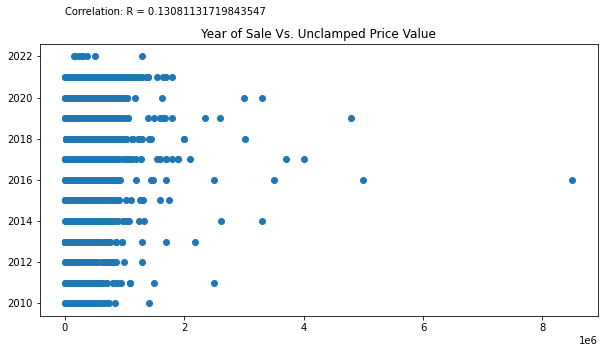

In [158]:
# Scatter plot of year of sale against unclamped price values in training split

text_string = str(df_train[['Price', 'Year_of_Sale']].corr().to_numpy()[0, 1])

plt.figure(figsize=(10,5))
plt.scatter(df_train['Price'], df_train['Year_of_Sale'])
plt.title("Year of Sale Vs. Unclamped Price Value")
plt.text(0, 2024, "Correlation: R = " + text_string)
plt.show()

Given the large number of values being used in this scatter plot, as well as the intact outliers, it is difficult to extrapolate much from this plot. However, the frequency of values towards the right hand side of the plot (the more expensive side of the plot) does appear to increase a bit as the years progress, indicative of the slight positive correlation observed in the data. A plot was also created with the averages of the yearly prices below although it was summised that this would most likely add little value to the above plot given the large deviations in price across the year potentially warping some of the averages.

In [159]:
# Check that method to create average price for the year in question works

df_2010 = df[['Year_of_Sale', 'Price']][df['Year_of_Sale'] == 2010]
df_2010_average_price = sum(df_2010['Price']) / len(df_2010['Price'])
df_2010_average_price

231512.07018686636

In [160]:
# Create average price for each year

df_2011 = df[['Year_of_Sale', 'Price']][df['Year_of_Sale'] == 2011]
df_2011_average_price = sum(df_2011['Price']) / len(df_2011['Price'])

df_2012 = df[['Year_of_Sale', 'Price']][df['Year_of_Sale'] == 2012]
df_2012_average_price = sum(df_2012['Price']) / len(df_2012['Price'])

df_2013 = df[['Year_of_Sale', 'Price']][df['Year_of_Sale'] == 2013]
df_2013_average_price = sum(df_2013['Price']) / len(df_2013['Price'])

df_2014 = df[['Year_of_Sale', 'Price']][df['Year_of_Sale'] == 2014]
df_2014_average_price = sum(df_2014['Price']) / len(df_2014['Price'])

df_2015 = df[['Year_of_Sale', 'Price']][df['Year_of_Sale'] == 2015]
df_2015_average_price = sum(df_2015['Price']) / len(df_2015['Price'])

df_2016 = df[['Year_of_Sale', 'Price']][df['Year_of_Sale'] == 2016]
df_2016_average_price = sum(df_2016['Price']) / len(df_2016['Price'])

df_2017 = df[['Year_of_Sale', 'Price']][df['Year_of_Sale'] == 2017]
df_2017_average_price = sum(df_2017['Price']) / len(df_2017['Price'])

df_2018 = df[['Year_of_Sale', 'Price']][df['Year_of_Sale'] == 2018]
df_2018_average_price = sum(df_2018['Price']) / len(df_2018['Price'])

df_2019 = df[['Year_of_Sale', 'Price']][df['Year_of_Sale'] == 2019]
df_2019_average_price = sum(df_2019['Price']) / len(df_2019['Price'])

df_2020 = df[['Year_of_Sale', 'Price']][df['Year_of_Sale'] == 2020]
df_2020_average_price = sum(df_2020['Price']) / len(df_2020['Price'])

df_2021 = df[['Year_of_Sale', 'Price']][df['Year_of_Sale'] == 2021]
df_2021_average_price = sum(df_2021['Price']) / len(df_2021['Price'])

df_2022 = df[['Year_of_Sale', 'Price']][df['Year_of_Sale'] == 2022]
df_2022_average_price = sum(df_2022['Price']) / len(df_2022['Price'])

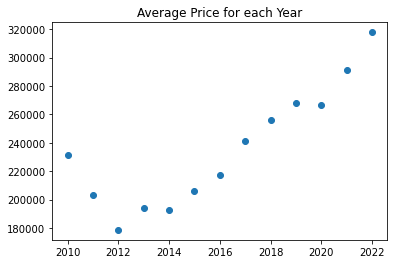

In [161]:
# Scatter plot of average yearly prices against their individual year

average_yearly_prices = [df_2010_average_price, df_2011_average_price, df_2012_average_price, df_2013_average_price,
                        df_2014_average_price, df_2015_average_price, df_2016_average_price, df_2017_average_price,
                        df_2018_average_price, df_2019_average_price, df_2020_average_price, df_2021_average_price,
                        df_2022_average_price]

plt.scatter(sorted(df_train['Year_of_Sale'].unique()), average_yearly_prices)
plt.title("Average Price for each Year")
plt.show()

When plotting the average yearly price against its corresponding year, a steady increase in prices from 2012 until the present can be clearly seen in the data in a nearly perfectly linear fashion. This further demonstrates that there is a meaningful relationship between the year of sale of a house and its likely selling price.

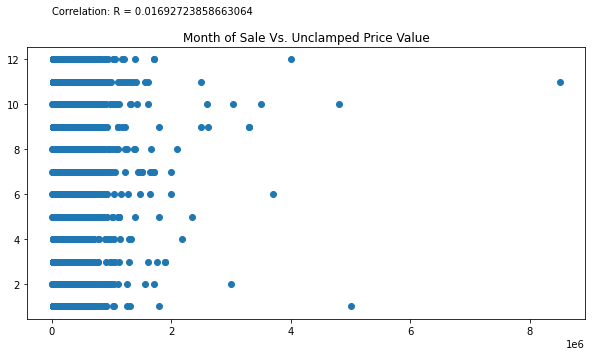

In [162]:
# Scatter plot of month of sale against unclamped price values in training split

text_string = str(df_train[['Price', 'Month_of_Sale']].corr().to_numpy()[0, 1])

plt.figure(figsize=(10,5))
plt.scatter(df_train['Price'], df_train['Month_of_Sale'])
plt.title("Month of Sale Vs. Unclamped Price Value")
plt.text(0, 14, "Correlation: R = " + text_string)
plt.show()

Using the same philosophy as above with the year of sale and looking at the density of these lines along with the correlation value (which was r = 0.014 for the price and month of sale relationship), it appears as though there is very little relationship shared between the month of sale and the price. While the months do seem to have different price patterns in each one, there is little pattern here that might offer additional insight into predicting price values and so this feature is most likely not well suited for use as a descriptive feature in predictive models.

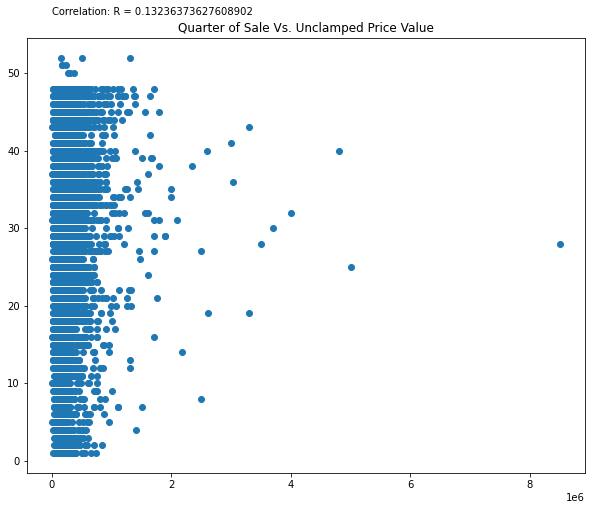

In [163]:
# Scatter plot of quarter of sale against unclamped price values in training split

text_string = str(df_train[['Price', 'Quarter_of_Sale']].corr().to_numpy()[0, 1])

plt.figure(figsize=(10,8))
plt.scatter(df_train['Price'], df_train['Quarter_of_Sale'])
plt.title("Quarter of Sale Vs. Unclamped Price Value")
plt.text(0, 57.5, "Correlation: R = " + text_string)
plt.show()

When looking at the line density for each quarter as shown above, there again does seem to be that slight trend towards more frequent larger prices as time increases, or as the quarters move forward. This matches with the very slight positive correlation (r = 0.13 approximately) that would match a pattern such as this. Given that both the year and the quarter values are both measurements of the same time interval, it is unlikely that having both used as descriptive features for predictions will add much value. Given the ever so slightly improved r value for the quarters feature, this is the more appropriate candidate for inclusion within the descriptive features.

### Plotting Continuous Variable Correlations for Clamped Data

Having assessed the correlations and plotted the relationships for the time-interval data and the price, it was then necessary to plot these same relationships but on the dataset with the clamped price values. The first step was to insert the new quarters feature into the clamped dataframe.

In [164]:
# Display the clamped price training split

df_train_clamped

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment
...,...,...,...,...,...,...,...,...,...
5734,2019,Kildare,5,"County Kildare, Leinster, Éire / Ireland",No,Kildare,365000.0,No,Second-Hand Dwelling house /Apartment
5191,2018,Offaly,5,"County Offaly, Leinster, Éire / Ireland",No,Offaly,240000.0,No,Second-Hand Dwelling house /Apartment
5390,2020,Clare,12,"Newmarket on Fergus, Shannon Municipal Distric...",No,Clare,67500.0,No,Second-Hand Dwelling house /Apartment
860,2020,Cork,11,"Cork, County Cork, Munster, T12 T997, Éire / I...",Yes,Cork,145000.0,No,Second-Hand Dwelling house /Apartment


In [165]:
# Quarters list can be directly added to the training split that is clamped as the individual entries in the clamped
# and unclamped dataframes are the same, just the prices have changed

df_train_clamped['Quarter_of_Sale'] = quarters
df_train_clamped

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property,Quarter_of_Sale
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment,47
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment,17
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment,39
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment,5
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment,7
...,...,...,...,...,...,...,...,...,...,...
5734,2019,Kildare,5,"County Kildare, Leinster, Éire / Ireland",No,Kildare,365000.0,No,Second-Hand Dwelling house /Apartment,38
5191,2018,Offaly,5,"County Offaly, Leinster, Éire / Ireland",No,Offaly,240000.0,No,Second-Hand Dwelling house /Apartment,34
5390,2020,Clare,12,"Newmarket on Fergus, Shannon Municipal Distric...",No,Clare,67500.0,No,Second-Hand Dwelling house /Apartment,44
860,2020,Cork,11,"Cork, County Cork, Munster, T12 T997, Éire / I...",Yes,Cork,145000.0,No,Second-Hand Dwelling house /Apartment,44


Once the clamped dataframe had the quarters feature, correlations were calculated to quickly ascertain which features would most likely show stronger relationships with the price feature than others.

In [166]:
# Calculate correlations for the continuous features and the clamped price feature

df_train_clamped[['Price', 'Year_of_Sale', 'Month_of_Sale', 'Quarter_of_Sale']].corr()

,Price,Year_of_Sale,Month_of_Sale,Quarter_of_Sale
Price,1.000000,0.197909,0.014058,0.199039
Year_of_Sale,0.197909,1.000000,-0.037759,0.995968
Month_of_Sale,0.014058,-0.037759,1.000000,0.049538
Quarter_of_Sale,0.199039,0.995968,0.049538,1.000000


As was noted previously, there were stronger relationships shown between the correlations of the time intervals and the price feature when the price feature clamped its outliers, notably for the year of sale and the rolling quarter of sale. These correlations were then plotted to visualise the relationships between the different descriptive features here and the target feature, the price.

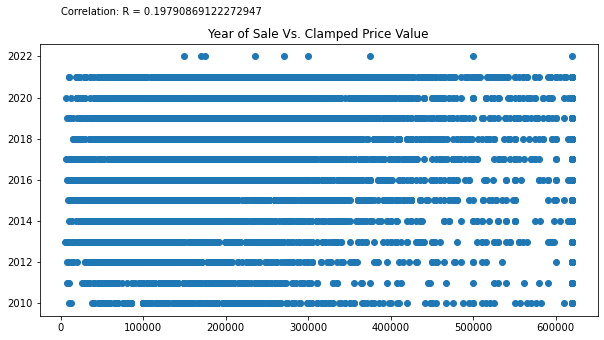

In [167]:
# Scatter plot of year of sale against clamped price values in training split

text_string = str(df_train_clamped[['Price', 'Year_of_Sale']].corr().to_numpy()[0, 1])

plt.figure(figsize=(10,5))
plt.scatter(df_train_clamped['Price'], df_train_clamped['Year_of_Sale'])
plt.title("Year of Sale Vs. Clamped Price Value")
plt.text(0, 2024, "Correlation: R = " + text_string)
plt.show()

The year of sale showed a weak positive relationship with the price of sale, as demonstrated both by the r value and the visualisation of the plotted features. These number of occurrences of more expensive house sales (values on the right hand side of the plot) appears to increase as time passes, increasing the visual density of the lines created by the sale values on the right hand side of the plot. This would indicate that there are more expensive house sales as time passes, validating the correlation value seen for these features.

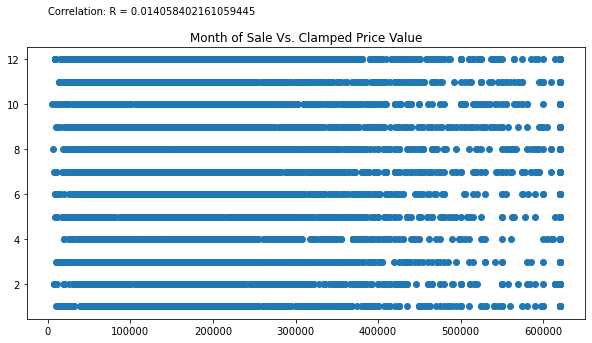

In [168]:
# Scatter plot of month of sale against clamped price values in training split

text_string = str(df_train_clamped[['Price', 'Month_of_Sale']].corr().to_numpy()[0, 1])

plt.figure(figsize=(10,5))
plt.scatter(df_train_clamped['Price'], df_train_clamped['Month_of_Sale'])
plt.title("Month of Sale Vs. Clamped Price Value")
plt.text(0, 14, "Correlation: R = " + text_string)
plt.show()

As with the unclamped data, there does not appear to be a meaningful relationship between the month of sale for a property and its sale price. The sale values do appear to have certain patterns for a given month versus another based on the frequency of occurences of sale prices in a given month, but without any noticeable pattern to it and with a negligible correlation value (approximately r = 0.01), it seems that there is no additional value to a predictive model in adding the month of sale as a descriptive feature.

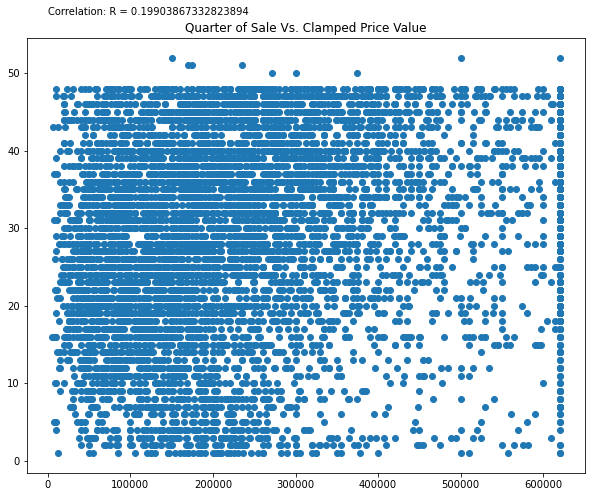

In [169]:
# Scatter plot of quarter of sale against clamped price values in training split

text_string = str(df_train_clamped[['Price', 'Quarter_of_Sale']].corr().to_numpy()[0, 1])

plt.figure(figsize=(10,8))
plt.scatter(df_train_clamped['Price'], df_train_clamped['Quarter_of_Sale'])
plt.title("Quarter of Sale Vs. Clamped Price Value")
plt.text(0, 57.5, "Correlation: R = " + text_string)
plt.show()

As with the quarter of sale and the price for unclamped data, the strongest correlation between a time interval feature and the price was for the quarter of sale in the clamped dataset. This feature had a correlation of approximately r = 0.2, demonstrating a weak positive correlation between the quarter of sale and the price. As with the year of sale, the frequency of sales that were more expensive appears to increase as time passes, increasing the density of markers on the right hand side of the plot (the more expensive prices) as the y value increases (as the quarter value increases). This visualisation validates the correlation value seen and further demonstrates that there is some sort of relationship between the price and the time that the house was sold at.

## Plotting Categorical Variable Correlations / Pairwise Interactions

### Major Train Route Feature

Having plotted the only continuous descriptive features, time, against the target price feature, interactions and relationships between the categorical features and the price target feature were then assessed to examine what features may be useful for predictive modelling later. It was decided to begin with the binary features - the Major_Train_Route feature, the Not_Full_Market_Price feature and the Description_of_Property feature. The Major_Train_Route and the Description_of_Property features had shown promise regarding their relationship with the target feature in the first assignment and as binary features it would prove a simple matter to encode these features as continuous using either a 1 or 0, thus allowing scatter plots to be created to easily assess the shape of the relationship.

In [170]:
# Display clamped training split

df_train_clamped

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property,Quarter_of_Sale
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment,47
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment,17
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment,39
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment,5
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment,7
...,...,...,...,...,...,...,...,...,...,...
5734,2019,Kildare,5,"County Kildare, Leinster, Éire / Ireland",No,Kildare,365000.0,No,Second-Hand Dwelling house /Apartment,38
5191,2018,Offaly,5,"County Offaly, Leinster, Éire / Ireland",No,Offaly,240000.0,No,Second-Hand Dwelling house /Apartment,34
5390,2020,Clare,12,"Newmarket on Fergus, Shannon Municipal Distric...",No,Clare,67500.0,No,Second-Hand Dwelling house /Apartment,44
860,2020,Cork,11,"Cork, County Cork, Munster, T12 T997, Éire / I...",Yes,Cork,145000.0,No,Second-Hand Dwelling house /Apartment,44


In [171]:
# Create list to contain binary encoding of major train route feature in the dataframe

major_train_route = []
for value in df_train_clamped['Major_Train_Route']:
    if value == "Yes":
        major_train_route.append(1)
    elif value == "No":
        major_train_route.append(0)

In [172]:
# Check that the binary encoding matches the major train route values in the first three entries in the training split

for i in range(3):
    print(major_train_route[i])

1
0
0


In [173]:
# Add the major train route binary encoding into both the clamped and unclamped training splits

df_train_clamped['Major_Train_Route_Num'] = major_train_route
df_train['Major_Train_Route_Num'] = major_train_route

In [174]:
# Check that the binary encoding for the major train route was added to the clamped dataframe correctly

df_train_clamped

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property,Quarter_of_Sale,Major_Train_Route_Num
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment,47,1
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment,17,0
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment,39,0
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment,5,1
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment,7,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,2019,Kildare,5,"County Kildare, Leinster, Éire / Ireland",No,Kildare,365000.0,No,Second-Hand Dwelling house /Apartment,38,0
5191,2018,Offaly,5,"County Offaly, Leinster, Éire / Ireland",No,Offaly,240000.0,No,Second-Hand Dwelling house /Apartment,34,0
5390,2020,Clare,12,"Newmarket on Fergus, Shannon Municipal Distric...",No,Clare,67500.0,No,Second-Hand Dwelling house /Apartment,44,0
860,2020,Cork,11,"Cork, County Cork, Munster, T12 T997, Éire / I...",Yes,Cork,145000.0,No,Second-Hand Dwelling house /Apartment,44,1


In [175]:
# Check that the major train route binary encoding was added to the unclamped dataframe correctly

df_train

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property,Quarter_of_Sale,Major_Train_Route_Num
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment,47,1
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment,17,0
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment,39,0
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment,5,1
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment,7,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,2019,Kildare,5,"County Kildare, Leinster, Éire / Ireland",No,Kildare,365000.0,No,Second-Hand Dwelling house /Apartment,38,0
5191,2018,Offaly,5,"County Offaly, Leinster, Éire / Ireland",No,Offaly,240000.0,No,Second-Hand Dwelling house /Apartment,34,0
5390,2020,Clare,12,"Newmarket on Fergus, Shannon Municipal Distric...",No,Clare,67500.0,No,Second-Hand Dwelling house /Apartment,44,0
860,2020,Cork,11,"Cork, County Cork, Munster, T12 T997, Éire / I...",Yes,Cork,145000.0,No,Second-Hand Dwelling house /Apartment,44,1


For the major train route feature, once it had been confirmed that both the clamped and unclamped dataframe had had the encoded train route feature inserted correctly, scatter plots and correlations were then created to assess the relationship between these variables and the price feature, if there was any.

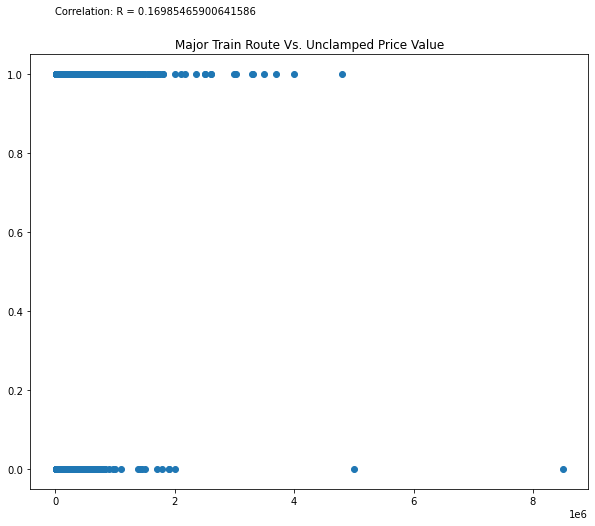

In [176]:
# Scatter plot of major train route values against unclamped price values in training split

text_string = str(df_train[['Price', 'Major_Train_Route_Num']].corr().to_numpy()[0, 1])

plt.figure(figsize=(10,8))
plt.scatter(df_train['Price'], df_train['Major_Train_Route_Num'])
plt.title("Major Train Route Vs. Unclamped Price Value")
plt.text(0, 1.15, "Correlation: R = " + text_string)
plt.show()

Based on the above plot and correlation of approximately r = 0.17, it appeared that there was a slight positive correlation between the major train route value and the price feature. Based on the frequencies of both 0 (the encoded no value) and 1, there appeared to be more frequent occurences of sales for more expensive properties in the areas marked with a major train route in them.

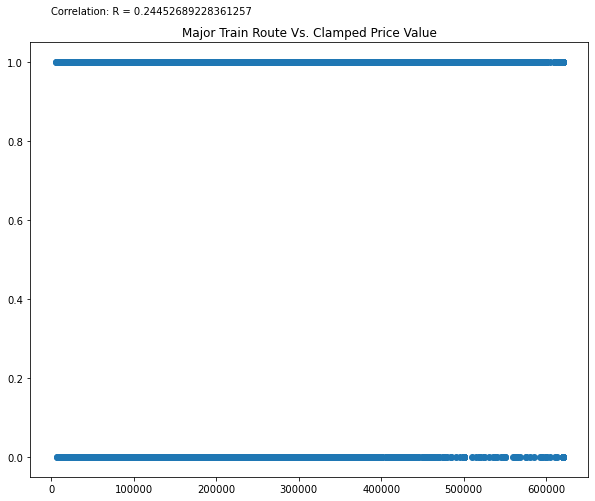

In [177]:
# Scatter plot of major train route values against clamped price values in training split

text_string = str(df_train_clamped[['Price', 'Major_Train_Route_Num']].corr().to_numpy()[0, 1])

plt.figure(figsize=(10,8))
plt.scatter(df_train_clamped['Price'], df_train_clamped['Major_Train_Route_Num'])
plt.title("Major Train Route Vs. Clamped Price Value")
plt.text(0, 1.12, "Correlation: R = " + text_string)
plt.show()

Given the inherent difficulty of visualising a binary feature using a scatter plot, especially with the clamped values making it difficult to spot differences in the frequencies of values at different points in the range of possible values, it was decided that a box plot comparing the two features would be a helpful addition to visualising the discrepancies in the price values and the two possible choices for the major train route value. This plot was only carried out with the clamped price feature as the unclamped price feature outliers would render a box plot illegible.

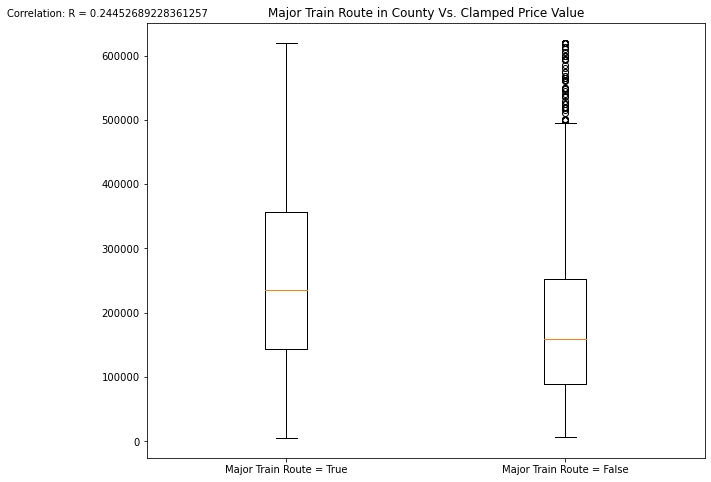

In [178]:
# Box plot of major train route feature and correlation with clamped price feature

box_plot_data = [df_train_clamped['Price'][df_train_clamped['Major_Train_Route_Num'] == 1],
                df_train_clamped['Price'][df_train_clamped['Major_Train_Route_Num'] == 0]]
plot_labels = ["Major Train Route = True", "Major Train Route = False"]

text_string = str(df_train_clamped[['Price', 'Major_Train_Route_Num']].corr().to_numpy()[0, 1])
plt.figure(figsize=(10,8))
plt.boxplot(box_plot_data, labels=plot_labels)
plt.title("Major Train Route in County Vs. Clamped Price Value")
plt.text(0, 660000, "Correlation: R = " + text_string)
plt.show()

For the clamped dataframe, once the price feature was clamped the same relationship as seen with the unclamped price feature and the major train route value was seen but the strength of this correlation increased to approximately r = 0.24, giving this value a weak positive correlation with the price feature. Once again, with a correlation value greater than 0.2, it seemed to suggest that the major train route value would be a meaningful addition to the predictive power of a model trained using this feature. This relationship can be seen in the box plot as while the major train route = false box has outliers on the more expensive end of property prices, the major train route = true box does not share this trait with no outliers on either side of its distribution. This with the higher highlighted median value shows that for those properties sold in the same county as a major train route versus those properties sold in counties without a major train route, the former will be slightly more likely to be within the more expensive end of the range shown here.

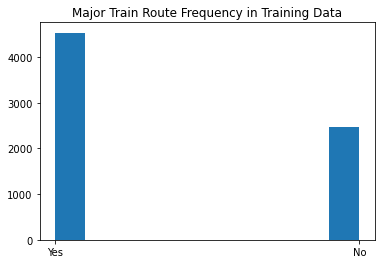

In [179]:
# Histogram distribution of the major train route feature in the training split

plt.hist(df_train['Major_Train_Route'])
plt.title("Major Train Route Frequency in Training Data")
plt.show()

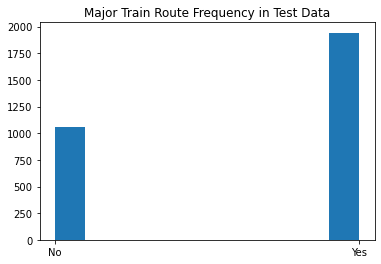

In [180]:
# Histogram distribution of the major train route feature in the test split

plt.hist(df_test['Major_Train_Route'])
plt.title("Major Train Route Frequency in Test Data")
plt.show()

It should be noted though, as seen above that for the major train route feature, there is an uneven representation of values with the majority of values in this dataset ranked with a yes for the major train route feature. This histogram plot was then repeated but for the test dataset and this relationship appeared to be similar for both the test and train sets, indicating that this may be a natural occurence within the data itself and not a sampling issue.

### Property Description Feature

After assessing the relationship with the binary feature for train routes, the next binary feature to include was the property description feature to assess any relationship that it might have with the price. It was decided to arbitrarily encode the values in this feature as a 1 for second-hand properties and a 0 for new properties.

In [181]:
# Check what the appropriate values are for the property description feature

df_train_clamped['Description_of_Property'].unique()

['Second-Hand Dwelling house /Apartment', 'New Dwelling house /Apartment']
Categories (2, object): ['New Dwelling house /Apartment', 'Second-Hand Dwelling house /Apartment']

In [182]:
# Create a list to hold the binary encoding of the property description feature

property_description = []
for value in df_train_clamped['Description_of_Property']:
    if value == "Second-Hand Dwelling house /Apartment":
        property_description.append(1)
    elif value == "New Dwelling house /Apartment":
        property_description.append(0)

In [183]:
# Check the binary encoding of the property description was done correctly

property_description

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [184]:
# Add property description encoding to both unclamped and clamped training splits and check the unclamped training
# split was updated correctly

df_train['Description_of_Property_Num'] = property_description
df_train_clamped['Description_of_Property_Num'] = property_description
df_train

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property,Quarter_of_Sale,Major_Train_Route_Num,Description_of_Property_Num
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment,47,1,1
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment,17,0,1
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment,39,0,1
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment,5,1,1
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2019,Kildare,5,"County Kildare, Leinster, Éire / Ireland",No,Kildare,365000.0,No,Second-Hand Dwelling house /Apartment,38,0,1
5191,2018,Offaly,5,"County Offaly, Leinster, Éire / Ireland",No,Offaly,240000.0,No,Second-Hand Dwelling house /Apartment,34,0,1
5390,2020,Clare,12,"Newmarket on Fergus, Shannon Municipal Distric...",No,Clare,67500.0,No,Second-Hand Dwelling house /Apartment,44,0,1
860,2020,Cork,11,"Cork, County Cork, Munster, T12 T997, Éire / I...",Yes,Cork,145000.0,No,Second-Hand Dwelling house /Apartment,44,1,1


In [185]:
# Check that the clamped training split was updated correctly

df_train_clamped

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property,Quarter_of_Sale,Major_Train_Route_Num,Description_of_Property_Num
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment,47,1,1
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment,17,0,1
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment,39,0,1
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment,5,1,1
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2019,Kildare,5,"County Kildare, Leinster, Éire / Ireland",No,Kildare,365000.0,No,Second-Hand Dwelling house /Apartment,38,0,1
5191,2018,Offaly,5,"County Offaly, Leinster, Éire / Ireland",No,Offaly,240000.0,No,Second-Hand Dwelling house /Apartment,34,0,1
5390,2020,Clare,12,"Newmarket on Fergus, Shannon Municipal Distric...",No,Clare,67500.0,No,Second-Hand Dwelling house /Apartment,44,0,1
860,2020,Cork,11,"Cork, County Cork, Munster, T12 T997, Éire / I...",Yes,Cork,145000.0,No,Second-Hand Dwelling house /Apartment,44,1,1


Once both the clamped and unclamped dataframes had the new property size value encoded in as a feature, with 0 referring to new properties and 1 referring to second hand properties, correlations were calculated and plotted with a scatter plot for the values to visualise the relationship between the property description and the price.

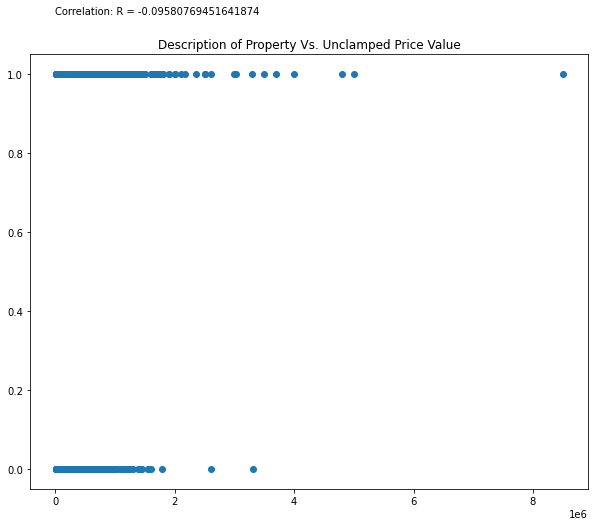

In [186]:
# Scatter plot of property description values against unclamped price values in training split

text_string = str(df_train[['Price', 'Description_of_Property_Num']].corr().to_numpy()[0, 1])

plt.figure(figsize=(10,8))
plt.scatter(df_train['Price'], df_train['Description_of_Property_Num'])
plt.title("Description of Property Vs. Unclamped Price Value")
plt.text(0, 1.15, "Correlation: R = " + text_string)
plt.show()

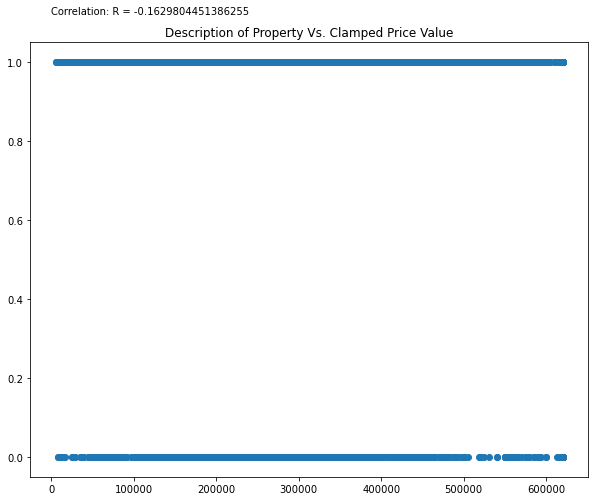

In [187]:
# Scatter plot of property description values against clamped price values in training split

text_string = str(df_train_clamped[['Price', 'Description_of_Property_Num']].corr().to_numpy()[0, 1])

plt.figure(figsize=(10,8))
plt.scatter(df_train_clamped['Price'], df_train_clamped['Description_of_Property_Num'])
plt.title("Description of Property Vs. Clamped Price Value")
plt.text(0, 1.12, "Correlation: R = " + text_string)
plt.show()

Both of the clamped and unclamped price features showed a slight negative correlation with the description of the property. Since the value of 0 referred to new properties, this would indicate that there was a relationship between more expensive dwellings being new dwellings and vice versa. This visualisation is not as clear with the scatter plots displayed above.

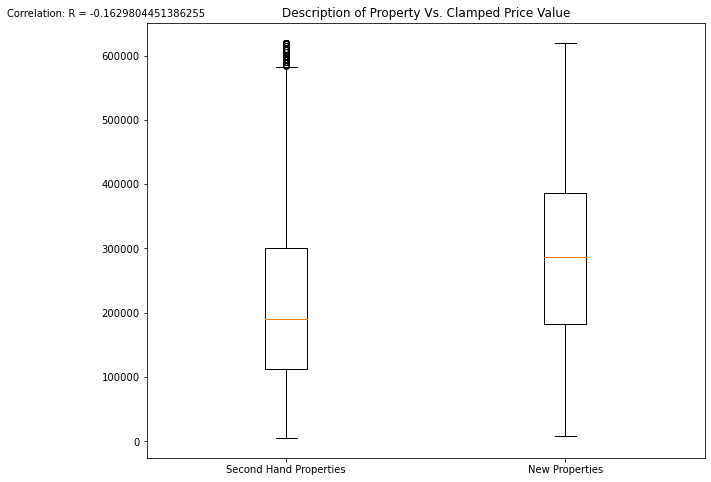

In [188]:
# Box plot of major train route feature and correlation with clamped price feature

box_plot_data = [df_train_clamped['Price'][df_train_clamped['Description_of_Property_Num'] == 1],
                df_train_clamped['Price'][df_train_clamped['Description_of_Property_Num'] == 0]]
plot_labels = ["Second Hand Properties", "New Properties"]

text_string = str(df_train_clamped[['Price', 'Description_of_Property_Num']].corr().to_numpy()[0, 1])
plt.figure(figsize=(10,8))
plt.boxplot(box_plot_data, labels=plot_labels)
plt.title("Description of Property Vs. Clamped Price Value")
plt.text(0, 660000, "Correlation: R = " + text_string)
plt.show()

The relationship between the description of the property for sale and its price are more clear based on this box plot. There is a clear differentiation between the typical price of new properties versus that of second hand properties. These second hand property values again have outliers present at the top end of their range that are not present in the new properties group, demonstrating further the typically more expensive price of new properties versus second-hand properties.

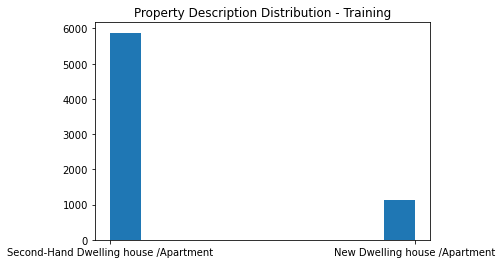

In [189]:
# Histogram distribution of the property description feature in the training split

plt.hist(df_train['Description_of_Property'])
plt.title("Property Description Distribution - Training")
plt.show()

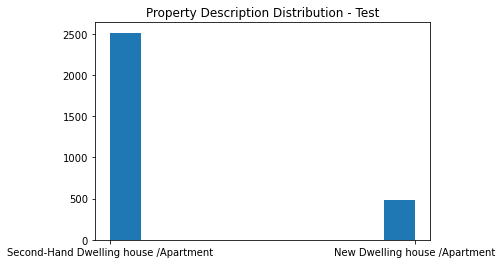

In [190]:
# Histogram distribution of the property description feature for the test split

plt.hist(df_test['Description_of_Property'])
plt.title("Property Description Distribution - Test")
plt.show()

As seen with the above distribution plots for this feature, there was a large discrepancy between the number of houses that were second hand and the number that were new. However, this distribution appears to have a very similar shape in both the training and testing sets and so it appears as if the difference in frequency for these values is an organic element of this feature in the data and not a sampling issue.

### Not Full Market Price Feature

The last binary categorical feature to examine regarding a relationship with the data here was the not full market price feature. It had been noted in the first assignment that this particular feature had little relationship to the price feature but no correlation values had been examined so that step was taken here using the same methods as for above. Not full market price was marked with a 1 for a No value and 0 for a yes value. This was done as the double negative no on a 1 would indicate that the house was indeed sold at full price and vice versa for 0.

In [191]:
# Create a list to hold binary encoding of full market price feature

full_price_description = []
for value in df_train_clamped['Not_Full_Market_Price']:
    if value == "No":
        full_price_description.append(1)
    elif value == "Yes":
        full_price_description.append(0)

In [192]:
# Add full market price feature to unclamped and clamped training splits
# Check that the unclamped training split now has full market price binary encoding

df_train['Full_Market_Price_Num'] = full_price_description
df_train_clamped['Full_Market_Price_Num'] = full_price_description
df_train

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property,Quarter_of_Sale,Major_Train_Route_Num,Description_of_Property_Num,Full_Market_Price_Num
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment,47,1,1,1
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment,17,0,1,1
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment,39,0,1,1
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment,5,1,1,1
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment,7,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2019,Kildare,5,"County Kildare, Leinster, Éire / Ireland",No,Kildare,365000.0,No,Second-Hand Dwelling house /Apartment,38,0,1,1
5191,2018,Offaly,5,"County Offaly, Leinster, Éire / Ireland",No,Offaly,240000.0,No,Second-Hand Dwelling house /Apartment,34,0,1,1
5390,2020,Clare,12,"Newmarket on Fergus, Shannon Municipal Distric...",No,Clare,67500.0,No,Second-Hand Dwelling house /Apartment,44,0,1,1
860,2020,Cork,11,"Cork, County Cork, Munster, T12 T997, Éire / I...",Yes,Cork,145000.0,No,Second-Hand Dwelling house /Apartment,44,1,1,1


In [193]:
# Check that clamped training split now has full market price binary encoding

df_train_clamped

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property,Quarter_of_Sale,Major_Train_Route_Num,Description_of_Property_Num,Full_Market_Price_Num
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment,47,1,1,1
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment,17,0,1,1
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment,39,0,1,1
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment,5,1,1,1
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment,7,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2019,Kildare,5,"County Kildare, Leinster, Éire / Ireland",No,Kildare,365000.0,No,Second-Hand Dwelling house /Apartment,38,0,1,1
5191,2018,Offaly,5,"County Offaly, Leinster, Éire / Ireland",No,Offaly,240000.0,No,Second-Hand Dwelling house /Apartment,34,0,1,1
5390,2020,Clare,12,"Newmarket on Fergus, Shannon Municipal Distric...",No,Clare,67500.0,No,Second-Hand Dwelling house /Apartment,44,0,1,1
860,2020,Cork,11,"Cork, County Cork, Munster, T12 T997, Éire / I...",Yes,Cork,145000.0,No,Second-Hand Dwelling house /Apartment,44,1,1,1


Once it had been checked that both the clamped and unclamped dataframes had had the full market price encoded feature successfully inserted then the next step was to check for a correlation between these values and their price feature.

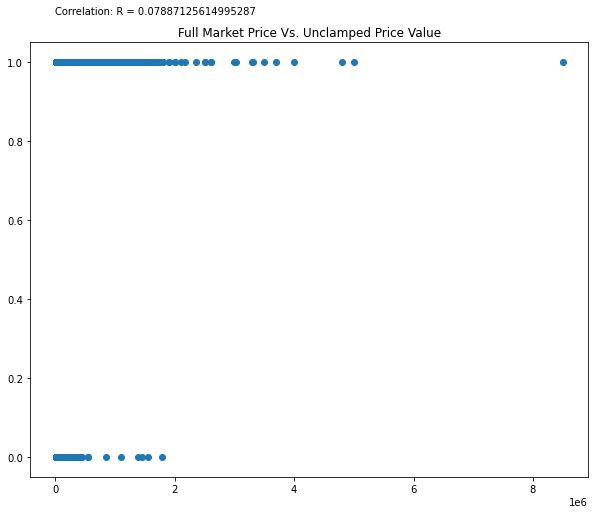

In [194]:
# Scatter plot with correlation of full market price feature and unclamped price feature

text_string = str(df_train[['Price', 'Full_Market_Price_Num']].corr().to_numpy()[0, 1])

plt.figure(figsize=(10,8))
plt.scatter(df_train['Price'], df_train['Full_Market_Price_Num'])
plt.title("Full Market Price Vs. Unclamped Price Value")
plt.text(0, 1.12, "Correlation: R = " + text_string)
plt.show()

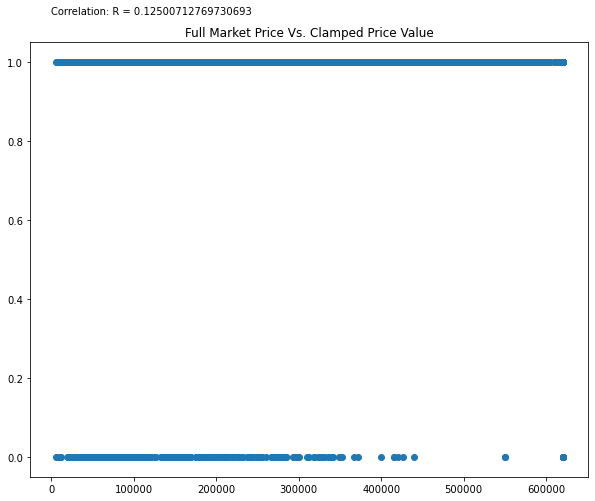

In [195]:
# Scatter plot with correlation of full market price feature and clamped price feature

text_string = str(df_train_clamped[['Price', 'Full_Market_Price_Num']].corr().to_numpy()[0, 1])

plt.figure(figsize=(10,8))
plt.scatter(df_train_clamped['Price'], df_train_clamped['Full_Market_Price_Num'])
plt.title("Full Market Price Vs. Clamped Price Value")
plt.text(0, 1.12, "Correlation: R = " + text_string)
plt.show()

There appears to be little to no relationship between the full market price attribute of a property and its sale price, although clamping the outliers for this feature increased its correlation r value beyond 0.1, meaning that for the clamped price values there may be some relationship between this variable and the target feature. As such it was decided to include this feature as a descriptive feature as despite its weak correlation with the target, it described a logical attribute of the property that no other feature had touched upon and so could add more weight to the prediction.

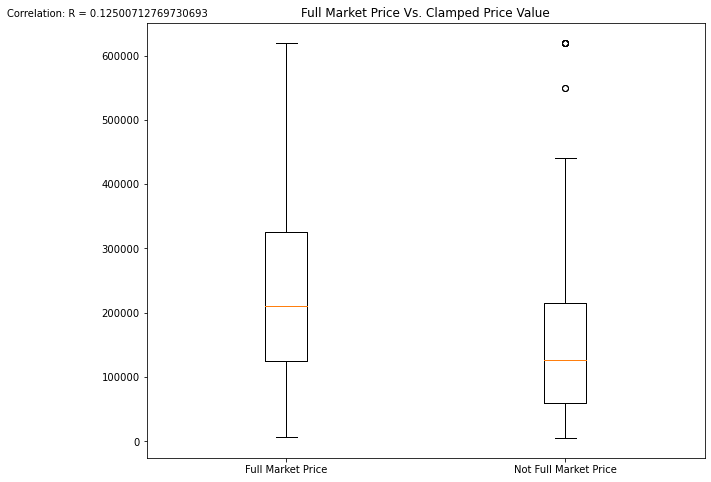

In [196]:
# Box plot of major train route feature and correlation with clamped price feature

box_plot_data = [df_train_clamped['Price'][df_train_clamped['Full_Market_Price_Num'] == 1],
                df_train_clamped['Price'][df_train_clamped['Full_Market_Price_Num'] == 0]]
plot_labels = ["Full Market Price", "Not Full Market Price"]

text_string = str(df_train_clamped[['Price', 'Full_Market_Price_Num']].corr().to_numpy()[0, 1])
plt.figure(figsize=(10,8))
plt.boxplot(box_plot_data, labels=plot_labels)
plt.title("Full Market Price Vs. Clamped Price Value")
plt.text(0, 660000, "Correlation: R = " + text_string)
plt.show()

The box plot visualisation of the full market price feature against the clamped price values makes a stronger case for including it in the predictive model. The full market price feature has clearly distinct ranges and typical values for the properties that are marked as being sold at full market price versus those that are marked as not being sold at that price. It shows that the houses that were sold at full market price are typically sold at higher prices than those not sold at full market price and so this relationship could add additional value to a predictive model of the price of a home.

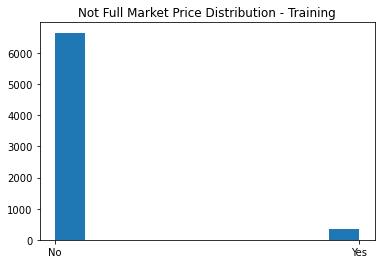

In [197]:
# Histogram distribution of full market price feature in training split

plt.hist(df_train['Not_Full_Market_Price'])
plt.title("Not Full Market Price Distribution - Training")
plt.show()

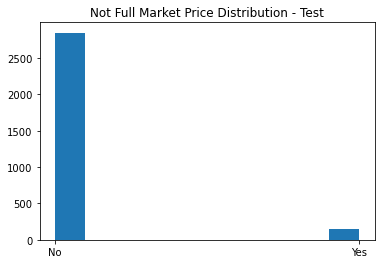

In [198]:
# Histogram distribution of full market price feature in test split

plt.hist(df_test['Not_Full_Market_Price'])
plt.title("Not Full Market Price Distribution - Test")
plt.show()

Once again with this feature there was a very large discrepancy in the values for yes and no. This very large discrepancy most likely had an impact on the determined strength of the relationship between the sale price and the not full market price feature. Given that this relationship again seemed to be consistent across training and test samples it seemed unlikely that sampling was the root cause of the issue here as this may be an organic element of the data.

### Post Code or County Feature

The next feature that was modelled against the data was the post code or county feature, as it was the most in depth look at an address available to the dataframe in its current state. It was decided to integer encode this feature as the feature had a large cardinality (almost 50 possible values), making it a potentially cumbersome choice for creating features for each different value.

In [199]:
# Check the unique values in the post code or county feature

df_train['Post_Code_or_County'].unique()

['Dublin 8', 'Laois', 'Donegal', 'Cork', 'Dublin', ..., 'Offaly', 'Dublin 17', 'Dublin 22', 'Longford', 'Dublin 6w']
Length: 48
Categories (48, object): ['Carlow', 'Cavan', 'Clare', 'Cork', ..., 'Waterford', 'Westmeath', 'Wexford', 'Wicklow']

In [200]:
# Create a list to encode the post code or county feature values and store those encoded values

post_code_or_county_encoding = []
for value in df_train['Post_Code_or_County'].unique():
    post_code_or_county_encoding.append(value)

In [201]:
# Check that the encoding list has correctly stored the values

post_code_or_county_encoding

['Dublin 8',
 'Laois',
 'Donegal',
 'Cork',
 'Dublin',
 'Galway',
 'Wicklow',
 'Dublin 11',
 'Leitrim',
 'Wexford',
 'Monaghan',
 'Clare',
 'Dublin 18',
 'Westmeath',
 'Dublin 12',
 'Mayo',
 'Dublin 5',
 'Dublin 13',
 'Dublin 4',
 'Limerick',
 'Dublin 16',
 'Waterford',
 'Meath',
 'Kerry',
 'Dublin 20',
 'Dublin 7',
 'Dublin 15',
 'Roscommon',
 'Dublin 6',
 'Tipperary',
 'Dublin 1',
 'Sligo',
 'Dublin 24',
 'Kilkenny',
 'Cavan',
 'Louth',
 'Dublin 9',
 'Dublin 2',
 'Kildare',
 'Dublin 14',
 'Carlow',
 'Dublin 10',
 'Dublin 3',
 'Offaly',
 'Dublin 17',
 'Dublin 22',
 'Longford',
 'Dublin 6w']

In [202]:
# Sort the encoding list to create a sequence to value the post code or county values

post_code_or_county_encoding = sorted(post_code_or_county_encoding)
post_code_or_county_encoding

['Carlow',
 'Cavan',
 'Clare',
 'Cork',
 'Donegal',
 'Dublin',
 'Dublin 1',
 'Dublin 10',
 'Dublin 11',
 'Dublin 12',
 'Dublin 13',
 'Dublin 14',
 'Dublin 15',
 'Dublin 16',
 'Dublin 17',
 'Dublin 18',
 'Dublin 2',
 'Dublin 20',
 'Dublin 22',
 'Dublin 24',
 'Dublin 3',
 'Dublin 4',
 'Dublin 5',
 'Dublin 6',
 'Dublin 6w',
 'Dublin 7',
 'Dublin 8',
 'Dublin 9',
 'Galway',
 'Kerry',
 'Kildare',
 'Kilkenny',
 'Laois',
 'Leitrim',
 'Limerick',
 'Longford',
 'Louth',
 'Mayo',
 'Meath',
 'Monaghan',
 'Offaly',
 'Roscommon',
 'Sligo',
 'Tipperary',
 'Waterford',
 'Westmeath',
 'Wexford',
 'Wicklow']

In [203]:
# Create a list to hold the integer encoded post code or county values and add 1 to avoid the zero index value

post_code_or_county = []
for value in df_train['Post_Code_or_County']:
    post_code_or_county.append(post_code_or_county_encoding.index(value) + 1)

In [204]:
# Check the first 5 entries in the training split

df_train.head(5)

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property,Quarter_of_Sale,Major_Train_Route_Num,Description_of_Property_Num,Full_Market_Price_Num
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment,47,1,1,1
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment,17,0,1,1
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment,39,0,1,1
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment,5,1,1,1
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment,7,1,1,1


In [205]:
# Check that the first 5 integer encoded values are correct

for i in range(5):
    print(post_code_or_county[i])

27
33
5
4
6


In [206]:
# Add post code or county integer encoding to unclamped and clamped training splits
# Check that the integer encoding was addedd to the unclamped training split correctly

df_train['Post_Code_or_County_Encoded'] = post_code_or_county
df_train_clamped['Post_Code_or_County_Encoded'] = post_code_or_county
df_train

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property,Quarter_of_Sale,Major_Train_Route_Num,Description_of_Property_Num,Full_Market_Price_Num,Post_Code_or_County_Encoded
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment,47,1,1,1,27
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment,17,0,1,1,33
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment,39,0,1,1,5
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment,5,1,1,1,4
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment,7,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2019,Kildare,5,"County Kildare, Leinster, Éire / Ireland",No,Kildare,365000.0,No,Second-Hand Dwelling house /Apartment,38,0,1,1,31
5191,2018,Offaly,5,"County Offaly, Leinster, Éire / Ireland",No,Offaly,240000.0,No,Second-Hand Dwelling house /Apartment,34,0,1,1,41
5390,2020,Clare,12,"Newmarket on Fergus, Shannon Municipal Distric...",No,Clare,67500.0,No,Second-Hand Dwelling house /Apartment,44,0,1,1,3
860,2020,Cork,11,"Cork, County Cork, Munster, T12 T997, Éire / I...",Yes,Cork,145000.0,No,Second-Hand Dwelling house /Apartment,44,1,1,1,4


In [207]:
# Check that the integer encoding for post code or county was added to the clamped training split correctly

df_train_clamped

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property,Quarter_of_Sale,Major_Train_Route_Num,Description_of_Property_Num,Full_Market_Price_Num,Post_Code_or_County_Encoded
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment,47,1,1,1,27
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment,17,0,1,1,33
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment,39,0,1,1,5
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment,5,1,1,1,4
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment,7,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2019,Kildare,5,"County Kildare, Leinster, Éire / Ireland",No,Kildare,365000.0,No,Second-Hand Dwelling house /Apartment,38,0,1,1,31
5191,2018,Offaly,5,"County Offaly, Leinster, Éire / Ireland",No,Offaly,240000.0,No,Second-Hand Dwelling house /Apartment,34,0,1,1,41
5390,2020,Clare,12,"Newmarket on Fergus, Shannon Municipal Distric...",No,Clare,67500.0,No,Second-Hand Dwelling house /Apartment,44,0,1,1,3
860,2020,Cork,11,"Cork, County Cork, Munster, T12 T997, Éire / I...",Yes,Cork,145000.0,No,Second-Hand Dwelling house /Apartment,44,1,1,1,4


Once it was clear that both the clamped and unclamped datasets had successfully inserted their encoding for the post code or county value, it was then decided to plot correlations against these values to see if there was a relationship between the post code or county where a property was sold and the price.

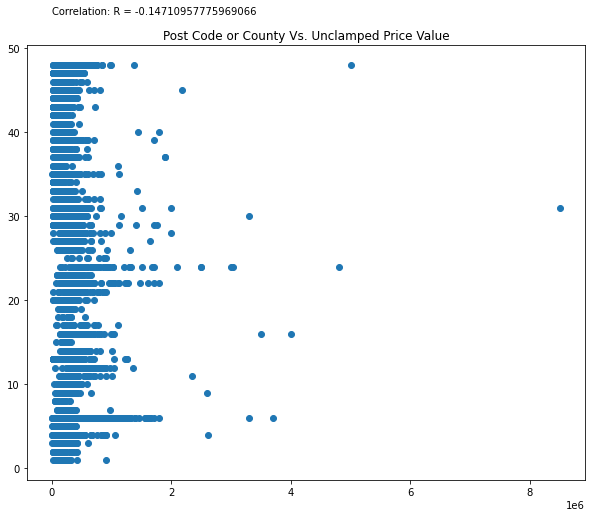

In [208]:
# Scatter plot with correlation of the post code or county values and the unclamped price value

text_string = str(df_train[['Price', 'Post_Code_or_County_Encoded']].corr().to_numpy()[0, 1])

plt.figure(figsize=(10,8))
plt.scatter(df_train['Price'], df_train['Post_Code_or_County_Encoded'])
plt.title("Post Code or County Vs. Unclamped Price Value")
plt.text(0, 54, "Correlation: R = " + text_string)
plt.show()

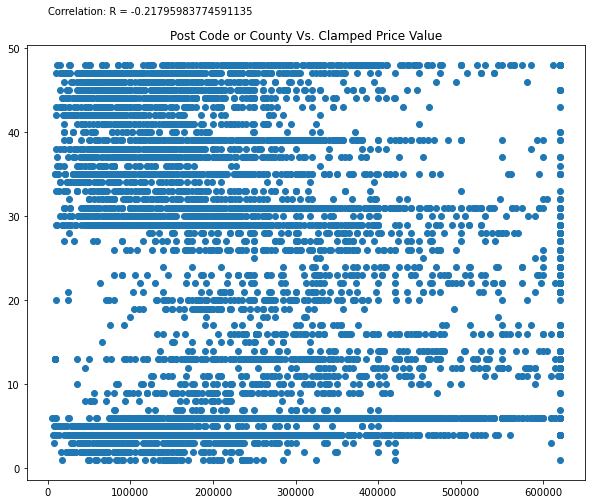

In [209]:
# Scatter plot with the correlation for the post code or county encoding and the clamped price feature

text_string = str(df_train_clamped[['Price', 'Post_Code_or_County_Encoded']].corr().to_numpy()[0, 1])

plt.figure(figsize=(10,8))
plt.scatter(df_train_clamped['Price'], df_train_clamped['Post_Code_or_County_Encoded'])
plt.title("Post Code or County Vs. Clamped Price Value")
plt.text(0, 54, "Correlation: R = " + text_string)
plt.show()

Both of the clamped and unclamped price feature had a slight negative correlation with the post code or county integer value. This was most likely caused by areas that appeared to have high selling prices being earlier in the alphabetic sorting of the feature with post code or county values. Areas such as Dublin and Cork with large cities had high selling values noted during the first assignment and so this could have potentially skewed the data somewhat. To that end, it was then decided to add an additional feature as a binary encoding of whether the house was sold in a county that contained an Irish city to examine that relationship with price. It was decided to include whole counties for these cities and not just areas in the city gathered from address values as the areas within the city could have also included commuter rich areas for people living outside or just outside of a city's limits but working within them. Examples like Dalkey or Dun Laoghaire as towns with populations that have anecdotally high house prices that act as commuter areas to Dublin city within county Dublin come to mind as an example.

The Republic of Ireland has 5 major cities - Dublin, Cork, Galway, Limerick and Waterford. A boolean value to separate properties in these counties from those outside of those main counties was created with a score of 1 representing the counties with those major cities in them and vice versa.

In [210]:
# Create a list to hold major city in county binary encoding and add binary encoded value according to the
# county feature inherent in the dataframe already

major_city_in_county = []
for value in df_train['County']:
    if value == "Dublin" or value == "Cork" or value == "Galway" or value == "Limerick" or value == "Waterford":
        major_city_in_county.append(1)
    else:
        major_city_in_county.append(0)

In [211]:
# Check first 5 entries in training split

df_train.head(5)

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property,Quarter_of_Sale,Major_Train_Route_Num,Description_of_Property_Num,Full_Market_Price_Num,Post_Code_or_County_Encoded
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment,47,1,1,1,27
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment,17,0,1,1,33
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment,39,0,1,1,5
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment,5,1,1,1,4
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment,7,1,1,1,6


In [212]:
# Check that first 5 values in major city encoding list are correctly encoded

for i in range(5):
    print(major_city_in_county[i])

1
0
0
1
1


In [213]:
# Add new major city in county feature to both unclamped and clamped training splits
# Check the unclamped training split has new major city in county binary encoding

df_train['Major_City_in_County'] = major_city_in_county
df_train_clamped['Major_City_in_County'] = major_city_in_county
df_train

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property,Quarter_of_Sale,Major_Train_Route_Num,Description_of_Property_Num,Full_Market_Price_Num,Post_Code_or_County_Encoded,Major_City_in_County
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment,47,1,1,1,27,1
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment,17,0,1,1,33,0
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment,39,0,1,1,5,0
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment,5,1,1,1,4,1
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment,7,1,1,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2019,Kildare,5,"County Kildare, Leinster, Éire / Ireland",No,Kildare,365000.0,No,Second-Hand Dwelling house /Apartment,38,0,1,1,31,0
5191,2018,Offaly,5,"County Offaly, Leinster, Éire / Ireland",No,Offaly,240000.0,No,Second-Hand Dwelling house /Apartment,34,0,1,1,41,0
5390,2020,Clare,12,"Newmarket on Fergus, Shannon Municipal Distric...",No,Clare,67500.0,No,Second-Hand Dwelling house /Apartment,44,0,1,1,3,0
860,2020,Cork,11,"Cork, County Cork, Munster, T12 T997, Éire / I...",Yes,Cork,145000.0,No,Second-Hand Dwelling house /Apartment,44,1,1,1,4,1


In [214]:
# Check that the clamped training split has the major city in county binary encoding

df_train_clamped

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property,Quarter_of_Sale,Major_Train_Route_Num,Description_of_Property_Num,Full_Market_Price_Num,Post_Code_or_County_Encoded,Major_City_in_County
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment,47,1,1,1,27,1
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment,17,0,1,1,33,0
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment,39,0,1,1,5,0
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment,5,1,1,1,4,1
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment,7,1,1,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2019,Kildare,5,"County Kildare, Leinster, Éire / Ireland",No,Kildare,365000.0,No,Second-Hand Dwelling house /Apartment,38,0,1,1,31,0
5191,2018,Offaly,5,"County Offaly, Leinster, Éire / Ireland",No,Offaly,240000.0,No,Second-Hand Dwelling house /Apartment,34,0,1,1,41,0
5390,2020,Clare,12,"Newmarket on Fergus, Shannon Municipal Distric...",No,Clare,67500.0,No,Second-Hand Dwelling house /Apartment,44,0,1,1,3,0
860,2020,Cork,11,"Cork, County Cork, Munster, T12 T997, Éire / I...",Yes,Cork,145000.0,No,Second-Hand Dwelling house /Apartment,44,1,1,1,4,1


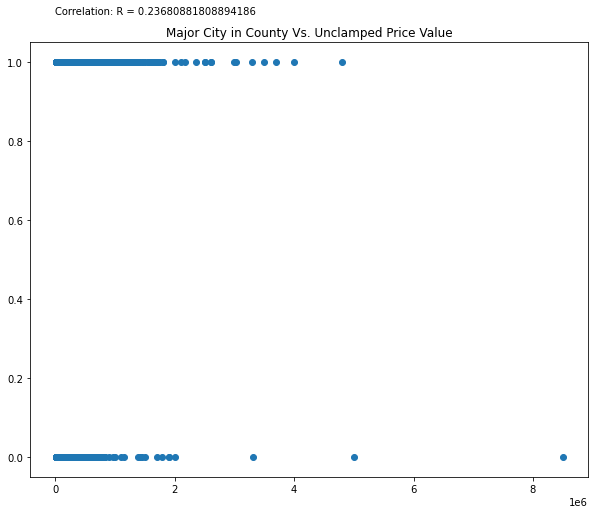

In [215]:
# Scatter plot with correlation of unclamped price feature and major city in county binary encoding

text_string = str(df_train[['Price', 'Major_City_in_County']].corr().to_numpy()[0, 1])

plt.figure(figsize=(10,8))
plt.scatter(df_train['Price'], df_train['Major_City_in_County'])
plt.title("Major City in County Vs. Unclamped Price Value")
plt.text(0, 1.12, "Correlation: R = " + text_string)
plt.show()

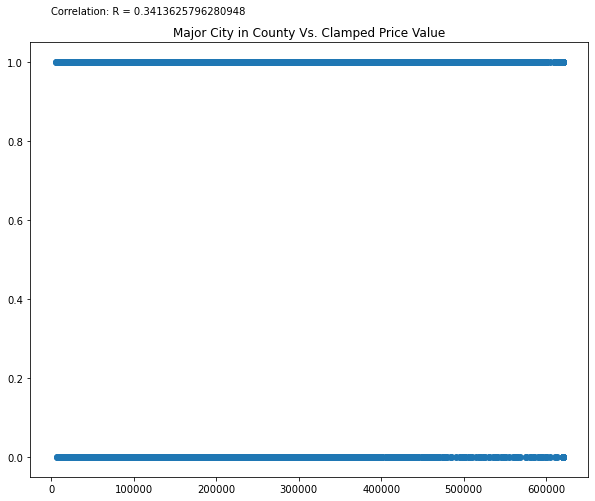

In [216]:
# Scatter plot with correlation of clamped price feature and major city in county binary encoding

text_string = str(df_train_clamped[['Price', 'Major_City_in_County']].corr().to_numpy()[0, 1])

plt.figure(figsize=(10,8))
plt.scatter(df_train_clamped['Price'], df_train_clamped['Major_City_in_County'])
plt.title("Major City in County Vs. Clamped Price Value")
plt.text(0, 1.12, "Correlation: R = " + text_string)
plt.show()

This new encoded feature for counties containing cities shares the strongest relationship with any of the descriptive features so far, with an r value of approximately 0.34 for the clamped data (indicating the prices seem to be more expensive in these counties compared to others). While the correlation is itself worth considering in terms of inclusion for later prediction, the scatter plots show little in the way of visualisation to assist this decision. In this instance, it was decided to create a box plot for both the clamped and unclamped data in order to better visualise the relationship between the price value and this encoded feature.

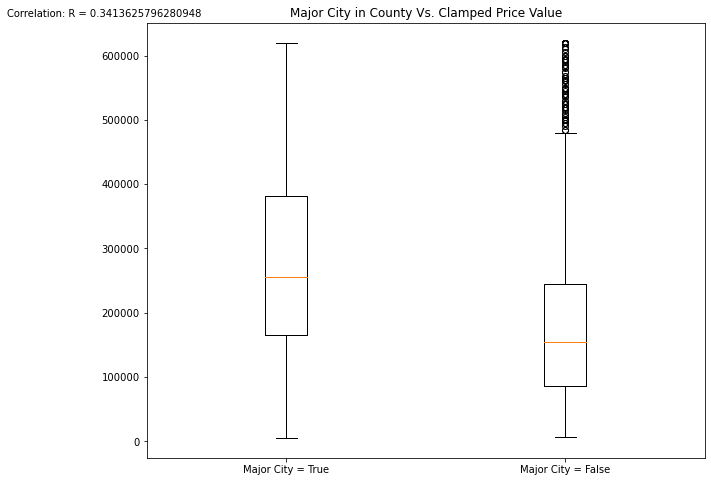

In [217]:
# Box plot of major county feature and correlation with clamped price feature

box_plot_data = [df_train_clamped['Price'][df_train_clamped['Major_City_in_County'] == 1],
                df_train_clamped['Price'][df_train_clamped['Major_City_in_County'] == 0]]
plot_labels = ["Major City = True", "Major City = False"]

text_string = str(df_train_clamped[['Price', 'Major_City_in_County']].corr().to_numpy()[0, 1])
plt.figure(figsize=(10,8))
plt.boxplot(box_plot_data, labels=plot_labels)
plt.title("Major City in County Vs. Clamped Price Value")
plt.text(0, 660000, "Correlation: R = " + text_string)
plt.show()

The boxplot was only included for the clamped data as the unclamped price data rendered the boxplot illegible due to the size of its outliers. Using the boxplot for visualisation, it was much clearer that there is a clear difference in the relationship between counties which contain a major city in them and the counties that do not. It was decided to include this as a descriptive feature for the predictive model on top of the major train route feature as while this does include geographical information for the house for sale as well as the major city feature, they are impacted by different factors and so could have additional insight for the predictive model when used together.

### County Feature

In order to encode the categorical county feature into something usable for a correlation, it was decided to encode the feature using binary encoding, so 26 new features would be added to the dataframe, one for each county option available. This could then be used to examine if there was any link between these values and the selling price of a house and whether it merited inclusion on top of the features that already linked to geographical location of a sold house.

In [218]:
# Create list to store names of each county and then create dictionary that uses those names as the key in key-value
# pairing with list

county_keys = []
for county in df_train['County'].unique():
    county_keys.append(county)
counties = {}
for county in county_keys:
    counties.update({str(county):[]})

In [219]:
# Check that dictionary has been created correctly

counties

{'Dublin': [],
 'Laois': [],
 'Donegal': [],
 'Cork': [],
 'Galway': [],
 'Wicklow': [],
 'Leitrim': [],
 'Wexford': [],
 'Monaghan': [],
 'Clare': [],
 'Westmeath': [],
 'Mayo': [],
 'Limerick': [],
 'Waterford': [],
 'Meath': [],
 'Kerry': [],
 'Roscommon': [],
 'Tipperary': [],
 'Sligo': [],
 'Kilkenny': [],
 'Cavan': [],
 'Louth': [],
 'Kildare': [],
 'Carlow': [],
 'Offaly': [],
 'Longford': []}

In [220]:
# Loop through counties in training split row by row, creating empty list of all counties each time
# County that matches current iteration adds 1 to its list value in dictionary and is removed from internal
# list of all counties
# Remaining counties add 0 to their value lists and then outer loop repeats

for county in df_train['County']:
    counties_to_update = []
    for county_check_item in df_train['County'].unique():
        counties_to_update.append(county_check_item)
    counties[str(county)].append(1)
    counties_to_update.remove(county)
    for remaining_county in counties_to_update:
        counties[str(remaining_county)].append(0)

In [221]:
# Check that value lists in counties dictionary updated correctly

counties['Dublin']

[1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,


In [222]:
# Check that value lists in counties dictionary updated correctly

counties['Cork']

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [223]:
# Check first 5 entries in training split dataframe

df_train.head(5)

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property,Quarter_of_Sale,Major_Train_Route_Num,Description_of_Property_Num,Full_Market_Price_Num,Post_Code_or_County_Encoded,Major_City_in_County
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment,47,1,1,1,27,1
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment,17,0,1,1,33,0
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment,39,0,1,1,5,0
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment,5,1,1,1,4,1
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment,7,1,1,1,6,1


In [224]:
# Check that value lists in counties dictionary updated correctly

counties['Laois']

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [225]:
# Check that value lists in counties dictionary updated correctly

counties['Donegal']

[0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [226]:
# Iterate over list of counties and then add each county as a feature to the training split, using its value
# from dictionary key-value pair as sequence of values

for county in county_keys:
    df_train[str(county)] = counties[str(county)]

In [227]:
# Check that county features were added correctly to unclamped training split

df_train

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property,Quarter_of_Sale,...,Roscommon,Tipperary,Sligo,Kilkenny,Cavan,Louth,Kildare,Carlow,Offaly,Longford
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment,47,...,0,0,0,0,0,0,0,0,0,0
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment,17,...,0,0,0,0,0,0,0,0,0,0
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment,39,...,0,0,0,0,0,0,0,0,0,0
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment,5,...,0,0,0,0,0,0,0,0,0,0
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2019,Kildare,5,"County Kildare, Leinster, Éire / Ireland",No,Kildare,365000.0,No,Second-Hand Dwelling house /Apartment,38,...,0,0,0,0,0,0,1,0,0,0
5191,2018,Offaly,5,"County Offaly, Leinster, Éire / Ireland",No,Offaly,240000.0,No,Second-Hand Dwelling house /Apartment,34,...,0,0,0,0,0,0,0,0,1,0
5390,2020,Clare,12,"Newmarket on Fergus, Shannon Municipal Distric...",No,Clare,67500.0,No,Second-Hand Dwelling house /Apartment,44,...,0,0,0,0,0,0,0,0,0,0
860,2020,Cork,11,"Cork, County Cork, Munster, T12 T997, Éire / I...",Yes,Cork,145000.0,No,Second-Hand Dwelling house /Apartment,44,...,0,0,0,0,0,0,0,0,0,0


In [228]:
# Add county features to clamped training split (same way as above)

for county in county_keys:
    df_train_clamped[str(county)] = counties[str(county)]

In [229]:
# Check that clamped training split now has the individual county features

df_train_clamped

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property,Quarter_of_Sale,...,Roscommon,Tipperary,Sligo,Kilkenny,Cavan,Louth,Kildare,Carlow,Offaly,Longford
9069,2021,Dublin 8,9,"South Circular Road, Bangor, County Down, Nort...",Yes,Dublin,170000.0,No,Second-Hand Dwelling house /Apartment,47,...,0,0,0,0,0,0,0,0,0,0
2603,2014,Laois,2,"County Laois, Leinster, Éire / Ireland",No,Laois,60000.0,No,Second-Hand Dwelling house /Apartment,17,...,0,0,0,0,0,0,0,0,0,0
7738,2019,Donegal,7,"County Donegal, Éire / Ireland",No,Donegal,130560.0,No,Second-Hand Dwelling house /Apartment,39,...,0,0,0,0,0,0,0,0,0,0
1579,2011,Cork,1,"Douglas, Donnybrook, Douglas, Cork, County Cor...",Yes,Cork,248000.0,No,Second-Hand Dwelling house /Apartment,5,...,0,0,0,0,0,0,0,0,0,0
5058,2011,Dublin,9,"Dublin 12, Leinster, Éire / Ireland",Yes,Dublin,157500.0,No,Second-Hand Dwelling house /Apartment,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2019,Kildare,5,"County Kildare, Leinster, Éire / Ireland",No,Kildare,365000.0,No,Second-Hand Dwelling house /Apartment,38,...,0,0,0,0,0,0,1,0,0,0
5191,2018,Offaly,5,"County Offaly, Leinster, Éire / Ireland",No,Offaly,240000.0,No,Second-Hand Dwelling house /Apartment,34,...,0,0,0,0,0,0,0,0,1,0
5390,2020,Clare,12,"Newmarket on Fergus, Shannon Municipal Distric...",No,Clare,67500.0,No,Second-Hand Dwelling house /Apartment,44,...,0,0,0,0,0,0,0,0,0,0
860,2020,Cork,11,"Cork, County Cork, Munster, T12 T997, Éire / I...",Yes,Cork,145000.0,No,Second-Hand Dwelling house /Apartment,44,...,0,0,0,0,0,0,0,0,0,0


Once both the training and the test splits had both has the newly created county features inserted into their respective dataframes, it was then time to examine these new features for any relationship with the target price feature. In order to improve the visibility of the output and reduce the size of each correlation matrix, it was decided to calculate the correlations for the counties and the price feature in groups. These groups were arbitrarily done by province as a means of logically separating the counties in the data.

In [230]:
# Calculate correlations for clamped price feature and the counties in Leinster

df_train_clamped[['Price','Dublin', 'Wicklow', 'Wexford', 'Carlow', 'Longford', 'Offaly', 'Kildare',
                 'Meath', 'Westmeath', 'Kilkenny', 'Laois', 'Louth']].corr()

,Price,Dublin,Wicklow,Wexford,Carlow,Longford,Offaly,Kildare,Meath,Westmeath,Kilkenny,Laois,Louth
Price,1.000000,0.477455,0.070703,-0.086908,-0.040751,-0.075833,-0.071414,0.051001,0.010268,-0.082671,-0.031424,-0.064324,-0.072077
Dublin,0.477455,1.000000,-0.122515,-0.133821,-0.062360,-0.061248,-0.081158,-0.164436,-0.134364,-0.097241,-0.082011,-0.085750,-0.117729
Wicklow,0.070703,-0.122515,1.000000,-0.034612,-0.016129,-0.015841,-0.020991,-0.042530,-0.034752,-0.025151,-0.021211,-0.022178,-0.030450
Wexford,-0.086908,-0.133821,-0.034612,1.000000,-0.017617,-0.017303,-0.022928,-0.046455,-0.037959,-0.027472,-0.023169,-0.024225,-0.033260
Carlow,-0.040751,-0.062360,-0.016129,-0.017617,1.000000,-0.008063,-0.010684,-0.021648,-0.017689,-0.012802,-0.010797,-0.011289,-0.015499
Longford,-0.075833,-0.061248,-0.015841,-0.017303,-0.008063,1.000000,-0.010494,-0.021262,-0.017373,-0.012573,-0.010604,-0.011087,-0.015222
Offaly,-0.071414,-0.081158,-0.020991,-0.022928,-0.010684,-0.010494,1.000000,-0.028173,-0.023021,-0.016661,-0.014051,-0.014692,-0.020171
Kildare,0.051001,-0.164436,-0.042530,-0.046455,-0.021648,-0.021262,-0.028173,1.000000,-0.046644,-0.033756,-0.028469,-0.029767,-0.040869
Meath,0.010268,-0.134364,-0.034752,-0.037959,-0.017689,-0.017373,-0.023021,-0.046644,1.000000,-0.027583,-0.023263,-0.024324,-0.033395
Westmeath,-0.082671,-0.097241,-0.025151,-0.027472,-0.012802,-0.012573,-0.016661,-0.033756,-0.027583,1.000000,-0.016836,-0.017603,-0.024168


In [231]:
# Calculate the correlations for the unclamped price feature against the counties in Leinster

df_train[['Price','Dublin', 'Wicklow', 'Wexford', 'Carlow', 'Longford', 'Offaly', 'Kildare',
                 'Meath', 'Westmeath', 'Kilkenny', 'Laois', 'Louth']].corr()

,Price,Dublin,Wicklow,Wexford,Carlow,Longford,Offaly,Kildare,Meath,Westmeath,Kilkenny,Laois,Louth
Price,1.000000,0.342438,0.048042,-0.064980,-0.028732,-0.047613,-0.050188,0.035750,-0.005783,-0.058466,-0.026092,-0.043174,-0.046502
Dublin,0.342438,1.000000,-0.122515,-0.133821,-0.062360,-0.061248,-0.081158,-0.164436,-0.134364,-0.097241,-0.082011,-0.085750,-0.117729
Wicklow,0.048042,-0.122515,1.000000,-0.034612,-0.016129,-0.015841,-0.020991,-0.042530,-0.034752,-0.025151,-0.021211,-0.022178,-0.030450
Wexford,-0.064980,-0.133821,-0.034612,1.000000,-0.017617,-0.017303,-0.022928,-0.046455,-0.037959,-0.027472,-0.023169,-0.024225,-0.033260
Carlow,-0.028732,-0.062360,-0.016129,-0.017617,1.000000,-0.008063,-0.010684,-0.021648,-0.017689,-0.012802,-0.010797,-0.011289,-0.015499
Longford,-0.047613,-0.061248,-0.015841,-0.017303,-0.008063,1.000000,-0.010494,-0.021262,-0.017373,-0.012573,-0.010604,-0.011087,-0.015222
Offaly,-0.050188,-0.081158,-0.020991,-0.022928,-0.010684,-0.010494,1.000000,-0.028173,-0.023021,-0.016661,-0.014051,-0.014692,-0.020171
Kildare,0.035750,-0.164436,-0.042530,-0.046455,-0.021648,-0.021262,-0.028173,1.000000,-0.046644,-0.033756,-0.028469,-0.029767,-0.040869
Meath,-0.005783,-0.134364,-0.034752,-0.037959,-0.017689,-0.017373,-0.023021,-0.046644,1.000000,-0.027583,-0.023263,-0.024324,-0.033395
Westmeath,-0.058466,-0.097241,-0.025151,-0.027472,-0.012802,-0.012573,-0.016661,-0.033756,-0.027583,1.000000,-0.016836,-0.017603,-0.024168


In [232]:
# Calculate the correlation for clamped price feature against counties in Munster

df_train_clamped[['Price','Cork', 'Limerick', 'Kerry', 'Tipperary', 'Waterford', 'Clare']].corr()

,Price,Cork,Limerick,Kerry,Tipperary,Waterford,Clare
Price,1.000000,-0.038501,-0.083087,-0.073632,-0.100853,-0.080496,-0.081581
Cork,-0.038501,1.000000,-0.067253,-0.059803,-0.055518,-0.058908,-0.051594
Limerick,-0.083087,-0.067253,1.000000,-0.034439,-0.031972,-0.033924,-0.029712
Kerry,-0.073632,-0.059803,-0.034439,1.000000,-0.028430,-0.030166,-0.026420
Tipperary,-0.100853,-0.055518,-0.031972,-0.028430,1.000000,-0.028005,-0.024527
Waterford,-0.080496,-0.058908,-0.033924,-0.030166,-0.028005,1.000000,-0.026025
Clare,-0.081581,-0.051594,-0.029712,-0.026420,-0.024527,-0.026025,1.000000


In [233]:
# Calculate the correlation for the unclamped price feature against the counties in Munster

df_train[['Price','Cork', 'Limerick', 'Kerry', 'Tipperary', 'Waterford', 'Clare']].corr()

,Price,Cork,Limerick,Kerry,Tipperary,Waterford,Clare
Price,1.000000,-0.041068,-0.060407,-0.045491,-0.070566,-0.053815,-0.058580
Cork,-0.041068,1.000000,-0.067253,-0.059803,-0.055518,-0.058908,-0.051594
Limerick,-0.060407,-0.067253,1.000000,-0.034439,-0.031972,-0.033924,-0.029712
Kerry,-0.045491,-0.059803,-0.034439,1.000000,-0.028430,-0.030166,-0.026420
Tipperary,-0.070566,-0.055518,-0.031972,-0.028430,1.000000,-0.028005,-0.024527
Waterford,-0.053815,-0.058908,-0.033924,-0.030166,-0.028005,1.000000,-0.026025
Clare,-0.058580,-0.051594,-0.029712,-0.026420,-0.024527,-0.026025,1.000000


In [234]:
# Calculate the correlation for the clamped price feature against the counties in Connacht

df_train_clamped[['Price','Galway', 'Sligo', 'Mayo', 'Roscommon', 'Leitrim']].corr()

,Price,Galway,Sligo,Mayo,Roscommon,Leitrim
Price,1.000000,-0.054066,-0.076852,-0.101304,-0.108945,-0.079949
Galway,-0.054066,1.000000,-0.029190,-0.035205,-0.027497,-0.022222
Sligo,-0.076852,-0.029190,1.000000,-0.018899,-0.014761,-0.011930
Mayo,-0.101304,-0.035205,-0.018899,1.000000,-0.017803,-0.014388
Roscommon,-0.108945,-0.027497,-0.014761,-0.017803,1.000000,-0.011237
Leitrim,-0.079949,-0.022222,-0.011930,-0.014388,-0.011237,1.000000


In [235]:
# Calculate the correlation for the unclamped price feature against the counties in Connacht

df_train[['Price','Galway', 'Sligo', 'Mayo', 'Roscommon', 'Leitrim']].corr()

,Price,Galway,Sligo,Mayo,Roscommon,Leitrim
Price,1.000000,-0.040494,-0.053417,-0.069946,-0.071816,-0.053374
Galway,-0.040494,1.000000,-0.029190,-0.035205,-0.027497,-0.022222
Sligo,-0.053417,-0.029190,1.000000,-0.018899,-0.014761,-0.011930
Mayo,-0.069946,-0.035205,-0.018899,1.000000,-0.017803,-0.014388
Roscommon,-0.071816,-0.027497,-0.014761,-0.017803,1.000000,-0.011237
Leitrim,-0.053374,-0.022222,-0.011930,-0.014388,-0.011237,1.000000


In [236]:
# Calculate the correlation for the clamped price feature against the counties in Ulster

df_train_clamped[['Price','Cavan', 'Donegal', 'Monaghan']].corr()

,Price,Cavan,Donegal,Monaghan
Price,1.000000,-0.101339,-0.141801,-0.041707
Cavan,-0.101339,1.000000,-0.022753,-0.010257
Donegal,-0.141801,-0.022753,1.000000,-0.014353
Monaghan,-0.041707,-0.010257,-0.014353,1.000000


In [237]:
# Calculate the correlation for the unclamped price feature against the counties in Ulster

df_train[['Price','Cavan', 'Donegal', 'Monaghan']].corr()

,Price,Cavan,Donegal,Monaghan
Price,1.000000,-0.068168,-0.095386,-0.016958
Cavan,-0.068168,1.000000,-0.022753,-0.010257
Donegal,-0.095386,-0.022753,1.000000,-0.014353
Monaghan,-0.016958,-0.010257,-0.014353,1.000000


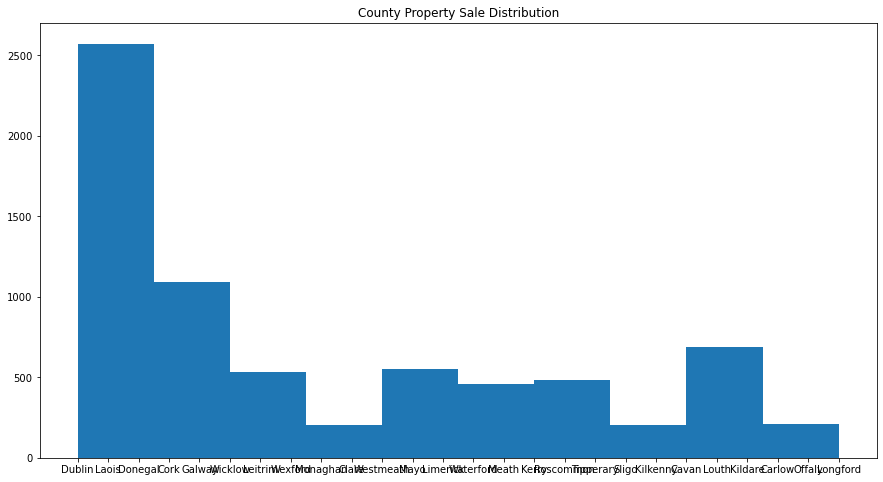

In [238]:
# Histogram distribution for the county feature in the training split

plt.figure(figsize=(15,8))
plt.hist(df_train['County'])
plt.title('County Property Sale Distribution')
plt.show()

In [239]:
# Printed value counts for the different feature values for the county feature in the training split

df_train['County'].value_counts()

Dublin       2250
Cork          732
Kildare       378
Galway        361
Limerick      261
Meath         257
Wexford       255
Donegal       216
Wicklow       215
Kerry         208
Waterford     202
Louth         199
Tipperary     180
Mayo          156
Clare         156
Westmeath     137
Cavan         112
Sligo         108
Laois         107
Kilkenny       98
Offaly         96
Roscommon      96
Leitrim        63
Carlow         57
Longford       55
Monaghan       45
Name: County, dtype: int64

In [240]:
# Printed value counts for the different feature values for the county feature in the test split

df_test['County'].value_counts()

Dublin       940
Cork         326
Kildare      165
Galway       156
Meath        124
Limerick     112
Wexford      106
Kerry        105
Wicklow       89
Donegal       82
Tipperary     79
Mayo          77
Louth         69
Waterford     66
Westmeath     57
Sligo         55
Clare         52
Laois         49
Cavan         46
Kilkenny      44
Offaly        44
Roscommon     43
Longford      36
Carlow        33
Leitrim       23
Monaghan      22
Name: County, dtype: int64

After looking at the correlations for the price of residential property against different counties in Ireland, by far the strongest relationship seen was with county Dublin and the clamped price data, with a correlation of approximately r = 0.48. This effect was most likely compounded by the uneven distribution of data in the dataset but what is interesting is the next strongest relationship seen was for the county Donegal and the clamped price data, with a correlation of approximately r = -0.14, suggesting that there is a slight tendency for houses in Donegal to be cheaper than in other parts of the country. Given that all other correlation values were less than r = 0.1 or approximately equal to that value in terms of absolute strength, these correlations were negligible and may not add any additional value to the prediction model. County Dublin however was also present in two other features within the descriptive features so far - the Major Train Route feature and the Major City feature. In order to avoid repeating the same information within the model it was then decided to only keep the Donegal county feature as a specific feature for this model.

## Chosen Descriptive Features

Based on the information gathered above and the different correlation values obtained, the descriptive features used for predictive modelling of this data to try and predict the target price feature were the Donegal county feature, the Major City in County feature, the Major Train Route feature, the Quarter of Sale feature, the Property Description feature and the Full Market Price feature. Given the consistent differences seen between the clamped and unclamped price correlations also, it was then decided to proceed with just the clamped price data. While it had been suggested to attempt to model both clamped and unclamped values, it appeared to create issues regarding the strength of correlations and take value away from the model's predictive capabilities.

In [241]:
# Check different feature names for the training split

df_train.columns

Index(['Year_of_Sale', 'Post_Code_or_County', 'Month_of_Sale', 'Address',
       'Major_Train_Route', 'County', 'Price', 'Not_Full_Market_Price',
       'Description_of_Property', 'Quarter_of_Sale', 'Major_Train_Route_Num',
       'Description_of_Property_Num', 'Full_Market_Price_Num',
       'Post_Code_or_County_Encoded', 'Major_City_in_County', 'Dublin',
       'Laois', 'Donegal', 'Cork', 'Galway', 'Wicklow', 'Leitrim', 'Wexford',
       'Monaghan', 'Clare', 'Westmeath', 'Mayo', 'Limerick', 'Waterford',
       'Meath', 'Kerry', 'Roscommon', 'Tipperary', 'Sligo', 'Kilkenny',
       'Cavan', 'Louth', 'Kildare', 'Carlow', 'Offaly', 'Longford'],
      dtype='object')

In [242]:
# Calculate correlations for chosen descriptive features and the clamped price feature

df_train_clamped[['Price', 'Quarter_of_Sale', 'Major_Train_Route_Num', 'Description_of_Property_Num',
                 'Full_Market_Price_Num', 'Major_City_in_County', 'Donegal']].corr()

,Price,Quarter_of_Sale,Major_Train_Route_Num,Description_of_Property_Num,Full_Market_Price_Num,Major_City_in_County,Donegal
Price,1.000000,0.199039,0.244527,-0.162980,0.125007,0.341363,-0.141801
Quarter_of_Sale,0.199039,1.000000,-0.008912,-0.029017,0.010162,0.000108,-0.005141
Major_Train_Route_Num,0.244527,-0.008912,1.000000,0.029295,0.015117,0.805302,-0.241876
Description_of_Property_Num,-0.162980,-0.029017,0.029295,1.000000,0.007356,0.001176,0.035119
Full_Market_Price_Num,0.125007,0.010162,0.015117,0.007356,1.000000,0.007585,-0.004672
Major_City_in_County,0.341363,0.000108,0.805302,0.001176,0.007585,1.000000,-0.194783
Donegal,-0.141801,-0.005141,-0.241876,0.035119,-0.004672,-0.194783,1.000000


The descriptive features that had been chosen for modelling to create price value predictions were then added to the test splits for the data as these features were all new features created as encodings of already existing features or entirely new features derived during the course of exploratory analysis of the training split data. These features were necessary to add to the test split in order for trained models to be able to use them in order to create their own predictions for the test data.

In [243]:
# Add quarter of sale feature to the clamped test split

quarters = []
for month in df_test_clamped['Month_of_Sale']:
    if month in quarter1:
        quarters.append(1)
    elif month in quarter2:
        quarters.append(2)
    elif month in quarter3:
        quarters.append(3)
    elif month in quarter4:
        quarters.append(4)
        
years = []
for year in df_test_clamped['Year_of_Sale']:
    years.append(year)
    
years_multiplier = []
for i in range(len(years)):
    years_multiplier.append(years_in_data.index(years[i]))
    
for i in range(len(quarters)):
    quarters[i] += (years_multiplier[i] * 4)
    
df_test_clamped['Quarter_of_Sale'] = quarters

In [244]:
# Add major train route binary encoding to the clamped test split

major_train_route = []
for value in df_test_clamped['Major_Train_Route']:
    if value == "Yes":
        major_train_route.append(1)
    elif value == "No":
        major_train_route.append(0)
        
df_test_clamped['Major_Train_Route_Num'] = major_train_route

In [245]:
# Add the property description binary encoding to the clamped test split

property_description = []
for value in df_test_clamped['Description_of_Property']:
    if value == "Second-Hand Dwelling house /Apartment":
        property_description.append(1)
    elif value == "New Dwelling house /Apartment":
        property_description.append(0)

df_test_clamped['Description_of_Property_Num'] = property_description

In [246]:
# Add the full market price binary encoding to the clamped test split

full_price_description = []
for value in df_test_clamped['Not_Full_Market_Price']:
    if value == "No":
        full_price_description.append(1)
    elif value == "Yes":
        full_price_description.append(0)
        
df_test_clamped['Full_Market_Price_Num'] = full_price_description

In [247]:
# Add the major city in county binary encoding to the clamped test split

major_city_in_county = []
for value in df_test_clamped['County']:
    if value == "Dublin" or value == "Cork" or value == "Galway" or value == "Limerick" or value == "Waterford":
        major_city_in_county.append(1)
    else:
        major_city_in_county.append(0)
        
df_test_clamped['Major_City_in_County'] = major_city_in_county

In [248]:
# Add individual county features to the clamped test split

county_keys = []
for county in df_test_clamped['County'].unique():
    county_keys.append(county)
counties = {}
for county in county_keys:
    counties.update({str(county):[]})

for county in df_test_clamped['County']:
    counties_to_update = []
    for county_check_item in df_test_clamped['County'].unique():
        counties_to_update.append(county_check_item)
    counties[str(county)].append(1)
    counties_to_update.remove(county)
    for remaining_county in counties_to_update:
        counties[str(remaining_county)].append(0)
        
for county in county_keys:
    df_test_clamped[str(county)] = counties[str(county)]

In [249]:
# Check that the clamped test split contains the new features as created for the clamped training split

df_test_clamped

,Year_of_Sale,Post_Code_or_County,Month_of_Sale,Address,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property,Quarter_of_Sale,...,Kilkenny,Cavan,Meath,Donegal,Leitrim,Roscommon,Galway,Longford,Monaghan,Carlow
6252,2014,Kildare,3,"Clane, The Municipal District of Clane — Mayno...",No,Kildare,232000.0,No,Second-Hand Dwelling house /Apartment,17,...,0,0,0,0,0,0,0,0,0,0
4684,2013,Waterford,9,"Clonmel, The Borough District of Clonmel, Coun...",Yes,Waterford,202500.0,No,Second-Hand Dwelling house /Apartment,15,...,0,0,0,0,0,0,0,0,0,0
1731,2021,Dublin 15,8,"Dublin 15, Leinster, Éire / Ireland",Yes,Dublin,380000.0,No,Second-Hand Dwelling house /Apartment,47,...,0,0,0,0,0,0,0,0,0,0
4742,2018,Cork,8,"Cork, County Cork, Munster, T12 T997, Éire / I...",Yes,Cork,425000.0,No,Second-Hand Dwelling house /Apartment,35,...,0,0,0,0,0,0,0,0,0,0
4521,2013,Kerry,8,"Kilgarvan, Kenmare Municipal District, County ...",Yes,Kerry,44000.0,Yes,Second-Hand Dwelling house /Apartment,15,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8014,2019,Dublin 13,6,"Dublin, Dublin 1, Leinster, Éire / Ireland",Yes,Dublin,620000.0,No,New Dwelling house /Apartment,38,...,0,0,0,0,0,0,0,0,0,0
1074,2021,Dublin 14,8,"Dublin 14, Leinster, Éire / Ireland",Yes,Dublin,530000.0,No,Second-Hand Dwelling house /Apartment,47,...,0,0,0,0,0,0,0,0,0,0
3063,2020,Mayo,12,"Ballina, Ballina Municipal District, County Ma...",Yes,Mayo,180000.0,No,Second-Hand Dwelling house /Apartment,44,...,0,0,0,0,0,0,0,0,0,0
6487,2019,Dublin 15,1,"Castleknock, Fingal, County Dublin, Leinster, ...",Yes,Dublin,620000.0,No,New Dwelling house /Apartment,37,...,0,0,0,0,0,0,0,0,0,0


## Part 2 - Linear Regression Modelling

Once the initial exploratory analysis had been complete and descriptive features for predicting the price value had been identified, the first model to be assessed for predictive power was a linear regression model using multiple features - the features that were described here. Once this model was trained, performance metrics to assess the error between its predictions and actual target values were calculated both for values in the training split and test split. Finally, cross validation testing was used to get an average value for these error metrics to get a more complete assessment of the predictive ability of the model.

### Training Linear Regression Model

In [250]:
# Create X and y variables for linear regression modelling and future modelling. Created from training split

X = df_train_clamped[['Quarter_of_Sale', 'Major_Train_Route_Num', 'Description_of_Property_Num', 'Full_Market_Price_Num',
             'Major_City_in_County', 'Donegal']]
y = df_train_clamped.Price

In [251]:
# Create a list of the descriptive features used in modelling
# Create linear regression object fitting descriptive features to target price feature

descriptive_features = ['Quarter_of_Sale', 'Major_Train_Route_Num', 'Description_of_Property_Num', 'Full_Market_Price_Num',
             'Major_City_in_County', 'Donegal']

linreg = LinearRegression().fit(X[descriptive_features], y)

In [252]:
# Print out descriptive features, their coefficients and the intercept / bias value

print("Features: \n", descriptive_features)
print("Coeficients: \n", linreg.coef_)
print("\nIntercept: \n", linreg.intercept_)

feature_importance = pd.DataFrame({'feature': descriptive_features, 'importance':linreg.coef_})
feature_importance.sort_values('importance', ascending=False)

Features: 
 ['Quarter_of_Sale', 'Major_Train_Route_Num', 'Description_of_Property_Num', 'Full_Market_Price_Num', 'Major_City_in_County', 'Donegal']
Coeficients: 
 [  2386.66614829 -29816.75572309 -65120.04267997  87438.80363342
 124719.8482972  -71432.24885598]

Intercept: 
 94869.89148395165


,feature,importance
4,Major_City_in_County,124719.848297
3,Full_Market_Price_Num,87438.803633
0,Quarter_of_Sale,2386.666148
1,Major_Train_Route_Num,-29816.755723
2,Description_of_Property_Num,-65120.042680
5,Donegal,-71432.248856


### Model Interpretation & Discussion

Based on the above output for the intercept and feature values for this linear regression model, it appears that most important factor for the determination of the price of house is the major city in county feature. As a binary feature, this is dictating that if the house was located in a county with a major city in it then the model adds approximately €125,000 to the price. Then if the house is determined to have been sold at full market price, another approximately €87,000 is added to the prediction value. Then for each quarter of sale value (i.e. for every 3 months that passes by in terms of the datasets time interval), a factor of approximately €2,400 is added to the price. So, if a house was sold in the tenth quarter of this dataset (meaning it was sold in quarter 2 of 2012), then €24,000 is added to the prediction price. The reason that this feature applies a factor weighting unlike the additive effect of the other features is that this feature has multiple possible values from 1 - 53. All the other features in this list are binary and thus apply the same weighting but only with a possible 0 (so no weighting when the feature importance is multiplied by zero) or 1 (adding the feature value directly to the prediction). Next, if there is a major train route present in the county that the property was sold in, then the price is decreased by approximately €30,000. Afterwards the description of the property i.e. whether it is second hand or first hand, is added to the model. If the value was 1 (the property was sold second-hand), then the value is decreased by approximately €65,000. Finally, if the house was located in county Donegal, the price of the house is decreased by approximately €71,000.

The intercept value in this model was approximately €95,000. For the purposes of this model, it can be interpreted that this model starts with an initial value of €95,000 and adjusts this value based on the output of the feature values and their weights added to the model with each progressive step.

### Predicted Vs. Actual Comparisons & Error Measures

In order to assess the performance of this linear regression model, the size of its average errors was used as this regression model is an error-based model in nature. This was first done by creating a dataframe to compare the price value of an entry in the targeted dataframe (be it the training or test split) with the prediction the model had made for that value and another column displaying the error of that prediction. Additional metrics were then used to provide a value for comparison for each model. Root mean squared error (RMSE), mean absolute error (MAE) and its r^2 value were used to determine the degree of error when making predictions for the target feature using this model.

#### Predicting values in the training split

In [253]:
# Create predictions using linear regression on values in training split and print out in dataframe

linreg_predictions = linreg.predict(X[descriptive_features])

print("\nPredictions with linear regression: \n")
actual_vs_predicted_linreg = pd.concat([y, pd.DataFrame(linreg_predictions, columns=['Predicted'], index=y.index)], axis=1)
print(actual_vs_predicted_linreg)


Predictions with linear regression: 

         Price      Predicted
9069  170000.0  324265.053981
2603   60000.0  157761.976958
7738  130560.0  138836.383365
1579  248000.0  224025.075753
5058  157500.0  228798.408050
...        ...            ...
5734  365000.0  207881.966072
5191  240000.0  198335.301479
5390   67500.0  222201.962962
860   145000.0  317105.055536
7270  147500.0  194771.873387

[7000 rows x 2 columns]


In [254]:
# Display first 10 entries in linear regression prediction dataframe

print(actual_vs_predicted_linreg.head(10))

             Price      Predicted
9069  170000.00000  324265.053981
2603   60000.00000  157761.976958
7738  130560.00000  138836.383365
1579  248000.00000  224025.075753
5058  157500.00000  228798.408050
5753  200000.00000   62463.066619
3548  387999.98835  377451.765920
409   212000.00000  188788.636886
4097  620000.00000  305171.724795
6461  182000.00000  326651.720129


In [255]:
# Create lists to hold actual and predicted price values

actual_price = []
for price in df_train_clamped['Price']:
    actual_price.append(price)
    
predicted_price = []
for prediction in actual_vs_predicted_linreg['Predicted']:
    predicted_price.append(prediction)

prediction_error = []
for i in range(len(actual_price)):
    prediction_error.append(actual_price[i] - predicted_price[i])

In [256]:
# Add prediction errors as column in linear regression predictions dataframe

actual_vs_predicted_linreg['PredictionErr'] = prediction_error
actual_vs_predicted_linreg

,Price,Predicted,PredictionErr
9069,170000.0,324265.053981,-154265.053981
2603,60000.0,157761.976958,-97761.976958
7738,130560.0,138836.383365,-8276.383365
1579,248000.0,224025.075753,23974.924247
5058,157500.0,228798.408050,-71298.408050
...,...,...,...
5734,365000.0,207881.966072,157118.033928
5191,240000.0,198335.301479,41664.698521
5390,67500.0,222201.962962,-154701.962962
860,145000.0,317105.055536,-172105.055536


In [257]:
# Calculate mean squared error for the linear regression predictions

mean_squared_error = 0
for error in prediction_error:
    mean_squared_error += (error**2)

mean_squared_error /= len(prediction_error)
print(f"The mean squared error (MSE) for the linear regression model was {mean_squared_error}")

The mean squared error (MSE) for the linear regression model was 19327651658.303646


In [258]:
# Calculate root mean squared error for the linear regression predictions

root_mean_squared_error = mean_squared_error ** 0.5
print(f"The root mean squared error (RMSE) for the linear regression model was {root_mean_squared_error}")

The root mean squared error (RMSE) for the linear regression model was 139023.92476945702


In [259]:
# Calculate the mean absolute error for the linear regression predictions

absolute_errors = []
for error in prediction_error:
    absolute_errors.append(abs(error))

mean_absolute_error = (sum(absolute_errors))/len(absolute_errors)
print(f"The mean absolute error (MAE) for the linear regression model was {mean_absolute_error}")

The mean absolute error (MAE) for the linear regression model was 107356.80727952687


In [260]:
# Display r^2 value for the linear regression predictions

r2_score = metrics.r2_score(actual_price, predicted_price)
print(f"The r^2 score for the linear regression model was {r2_score}")

The r^2 score for the linear regression model was 0.20350649503442253


The evaluation of the predictions can be primarily done for this model and its predictions on the training split using the RMSE, the MAE and the r^2 value. While the MSE can offer insight into the degree of error within a model and offer a basis of comparison, it does not speak directly to the degree of error in a model in the same units as the target feature that a model is predicting (Kelleher, Mac Namee and D'Arcy, 2020).

The first two measures being used in this example, the RMSE and the MAE, provide us error measures with the same units as the target value being predicted. Given that both of these values are well in excess of €100,000, we can definitively say that this linear regression model in its current state is an ineffective predictor of property sale prices and would not be usable in its current state.

Unlike the previous two measures, the r^2 value gives a domain-independent measure of error for a model by telling us how well our model performs compared to a model that would always predict the average price. The larger the r^2 value, typically the better our model performs. This model has an r^2 value of approximately 0.2, which according https://tutorials.methodsconsultants.com/posts/what-is-r-squared-understanding-the-coefficient-of-determination/ falls within Cohen's range for a meaningful association with the target value (based on the square root of values used for correlation coefficients, detailed in the above link). Another means of examining this variable is thinking of it as the amount of variance in the target feature that our model can explain i.e. this model can account for approximately 20% of the price value of any given house in the dataset. However given our prediction model error metrics and the fact that many common examples for r^2 values are scoring far higher (often above 0.75 at least - see above link and Kelleher, Mac Namee and D'Arcy, pg.578) this score can also be seen as a relatively poor value for this model's predictive capability.

#### Predicting values in the test split

In [261]:
# Create test X and y variables for fitting regression models on the test split

X_test = df_test_clamped[['Quarter_of_Sale', 'Major_Train_Route_Num', 'Description_of_Property_Num', 'Full_Market_Price_Num',
             'Major_City_in_County', 'Donegal']]
y_test = df_test_clamped.Price

# Predict prices in the test set using the trained linear regression model

test_predictions = linreg.predict(X_test)
print("Actual vs predicted on test:\n", pd.concat([y_test, pd.DataFrame(test_predictions, columns=['Predicted'], index=y_test.index)], axis=1))

Actual vs predicted on test:
          Price      Predicted
6252  232000.0  157761.976958
4684  202500.0  247891.737236
1731  380000.0  324265.053981
4742  425000.0  295625.060202
4521   44000.0   35733.085305
...        ...            ...
8014  620000.0  367905.101326
1074  530000.0  324265.053981
3063  180000.0  192385.207239
6487  620000.0  365518.435178
4705  620000.0  355971.770585

[3000 rows x 2 columns]


In [262]:
# Check that list containing actual price values in test split has been created successfully

test_actual_price = []
for price in y_test:
    test_actual_price.append(price)
    
test_actual_price

[232000.0,
 202500.0,
 380000.0,
 425000.0,
 44000.0,
 387000.0,
 385000.0,
 122500.0,
 367500.0,
 65000.0,
 173000.0,
 240000.0,
 175000.0,
 377000.0,
 79000.0,
 520000.0,
 53190.0,
 225000.0,
 192000.0,
 419000.0,
 620000.0,
 382892.25,
 272000.0,
 293000.0,
 464999.9887,
 236000.0,
 112500.0,
 263000.0,
 80000.0,
 80652.0,
 315000.0,
 375000.0,
 380000.0,
 245000.0,
 345000.0,
 73000.0,
 50000.0,
 255000.0,
 68000.12,
 209999.9927,
 164999.9894,
 60000.0,
 389000.0,
 125000.0,
 456525.375,
 215000.0,
 118000.0,
 502500.0028,
 412000.0,
 428000.0,
 163000.0,
 110000.0,
 620000.0,
 467500.0,
 136200.0,
 90000.0,
 60000.0,
 550000.0,
 180000.0,
 188410.0,
 370000.0,
 291695.0,
 160000.0,
 249999.99185,
 68500.0,
 52000.0,
 550000.0,
 160000.0,
 39350.45,
 45000.0,
 72000.0,
 260000.0,
 36500.0,
 555000.0,
 99275.0,
 175000.0,
 5878.165,
 78587.45,
 349999.9954,
 67500.0,
 272000.0,
 60000.0,
 620000.0,
 190000.0,
 620000.0,
 181000.0,
 68500.0,
 293500.0,
 221000.0,
 320000.0,
 150000.

In [263]:
# Display mean absolute error, mean squared error and r^2 value for the predictions on the test split

print("Test MAE: " + str(metrics.mean_absolute_error(test_actual_price, test_predictions)))
print("Test RMSE: " + str(metrics.mean_squared_error(test_actual_price, test_predictions)**0.5))
print("Test R^2: " + str(metrics.r2_score(test_actual_price, test_predictions)))

Test MAE: 105324.56105857225
Test RMSE: 135919.5417983862
Test R^2: 0.21476605390235093


Following on from the initial analysis of the training split metrics, the same can be said of the metrics provided from the test split. The poor performance measures from the first round of predictions generated on the target feature were not due to an 'unlucky split' or other unusual distribution of values in the training data but are caused by the structure of the model itself.

### Cross Validation Testing

Cross validation testing was done to verify the performance measures obtained from this data over multiple training and testing iterations. k-fold cross validation testing that was used in this analysis was done using 5 folds. As described by Kelleher, Mac Namee and D'Arcy (2020), the industry standard is to use 10 folds. However given that this was a relatively small data set already, it was decided to use less folds in order to have a larger test set on each round of cross validation testing to assess the performance measures more clearly. 

k-fold cross validation works by taking the dataset supplied to it (in this case the training split of the original data) and partitions the data into the number of specified subsections, in this case 5 folds. k-1 folds (so 4 folds here) are used to train a model and the last fold is used for testing the predictions made by that model. This process is repeated then k times, with each of the folds serving as the single test fold at some point. The results of all of these folds can then be average in order to generate more meaningful performance metrics for a given model.

In [264]:
# Set up cross validation tests to run and cross validate linear regression on 5 folds
# Display output for test metrics selected on each fold

cross_validate_measures = ['neg_mean_absolute_error', 'neg_root_mean_squared_error', 'r2']

scores = cross_validate(LinearRegression(), X, y, scoring=cross_validate_measures, cv=5)
scores

{'fit_time': array([0.00368428, 0.00199461, 0.00199604, 0.00199461, 0.00199437]),
 'score_time': array([0.00177407, 0.00199461, 0.00199342, 0.00199461, 0.00199437]),
 'test_neg_mean_absolute_error': array([-104589.82251666, -110104.78090194, -105785.33479829,
        -108881.94580942, -108162.06335085]),
 'test_neg_root_mean_squared_error': array([-137507.55796918, -142486.92919374, -136364.667094  ,
        -138425.51203399, -141065.92300786]),
 'test_r2': array([0.21962647, 0.19631058, 0.19674385, 0.19800956, 0.1938522 ])}

In [265]:
# Display the average value for selected performance metrics on cross validation testing

linreg_mae = (sum(scores['test_neg_mean_absolute_error']))/5
linreg_rmse = (sum(scores['test_neg_root_mean_squared_error']))/5
linreg_r2 = (sum(scores['test_r2']))/5

print("Average MAE over 5 folds: " + str(linreg_mae))
print("Average RMSE over 5 folds: " + str(linreg_rmse))
print("Average R^2 over 5 folds: " + str(linreg_r2))

Average MAE over 5 folds: -107504.78947543299
Average RMSE over 5 folds: -139170.1178597539
Average R^2 over 5 folds: 0.20090853330843203


After performing cross validation testing on this linear regression model using 5 folds, it was determined that the average values for the error measures were similar to those that were obtained for individual analyses on the training and test splits. This validates those results that were obtained and indicates that performance metrics of approximately MAE = €107,000, RMSE = €140,000 and r^2 = 0.2 are reasonable estimates for the performance of this model in predicting house prices.

## Part 3 - Decision Tree Modelling

The next prediction model used to predict price values was a decision tree regression model, which works by effectively learning a sequence of queries to question the data and divide it into subsets. It continues this process recursively until it reaches a stopping point - either there is only one data entry in a node in the tree or it has hit a predetermined stopping condition, for example it reaches a predefined maximum depth. Similar to the linear regression model above, this model was trained and evaluated on the training split data before being evaluated on the test data and then finally cross validation testing was done to verify the performance metrics that were determined for the training and testing splits.

### Training Decision Tree Model

In [266]:
# https://github.com/justmarkham/DAT4/blob/master/notebooks/15_decision_trees.ipynb for reference to this
# regression decision tree code in Python

# Create decision tree regressor and fit descriptive features against target price feature

tree_regression = DecisionTreeRegressor(random_state = 1, max_depth = 5)
tree_regression.fit(X[descriptive_features], y)

DecisionTreeRegressor(max_depth=5, random_state=1)

In [267]:
# Print out features and their associated feature importance

print("Features: \n", descriptive_features)
print("Importances: \n", tree_regression.feature_importances_)

Features: 
 ['Quarter_of_Sale', 'Major_Train_Route_Num', 'Description_of_Property_Num', 'Full_Market_Price_Num', 'Major_City_in_County', 'Donegal']
Importances: 
 [0.25358197 0.00069951 0.1318771  0.08470532 0.51028282 0.01885328]


In [268]:
# Create dataframe to display feature importances and display them in descending order

feature_importance = pd.DataFrame({'feature': X.columns, 'importance':tree_regression.feature_importances_})
feature_importance.sort_values('importance', ascending=False)

,feature,importance
4,Major_City_in_County,0.510283
0,Quarter_of_Sale,0.253582
2,Description_of_Property_Num,0.131877
3,Full_Market_Price_Num,0.084705
5,Donegal,0.018853
1,Major_Train_Route_Num,0.000700


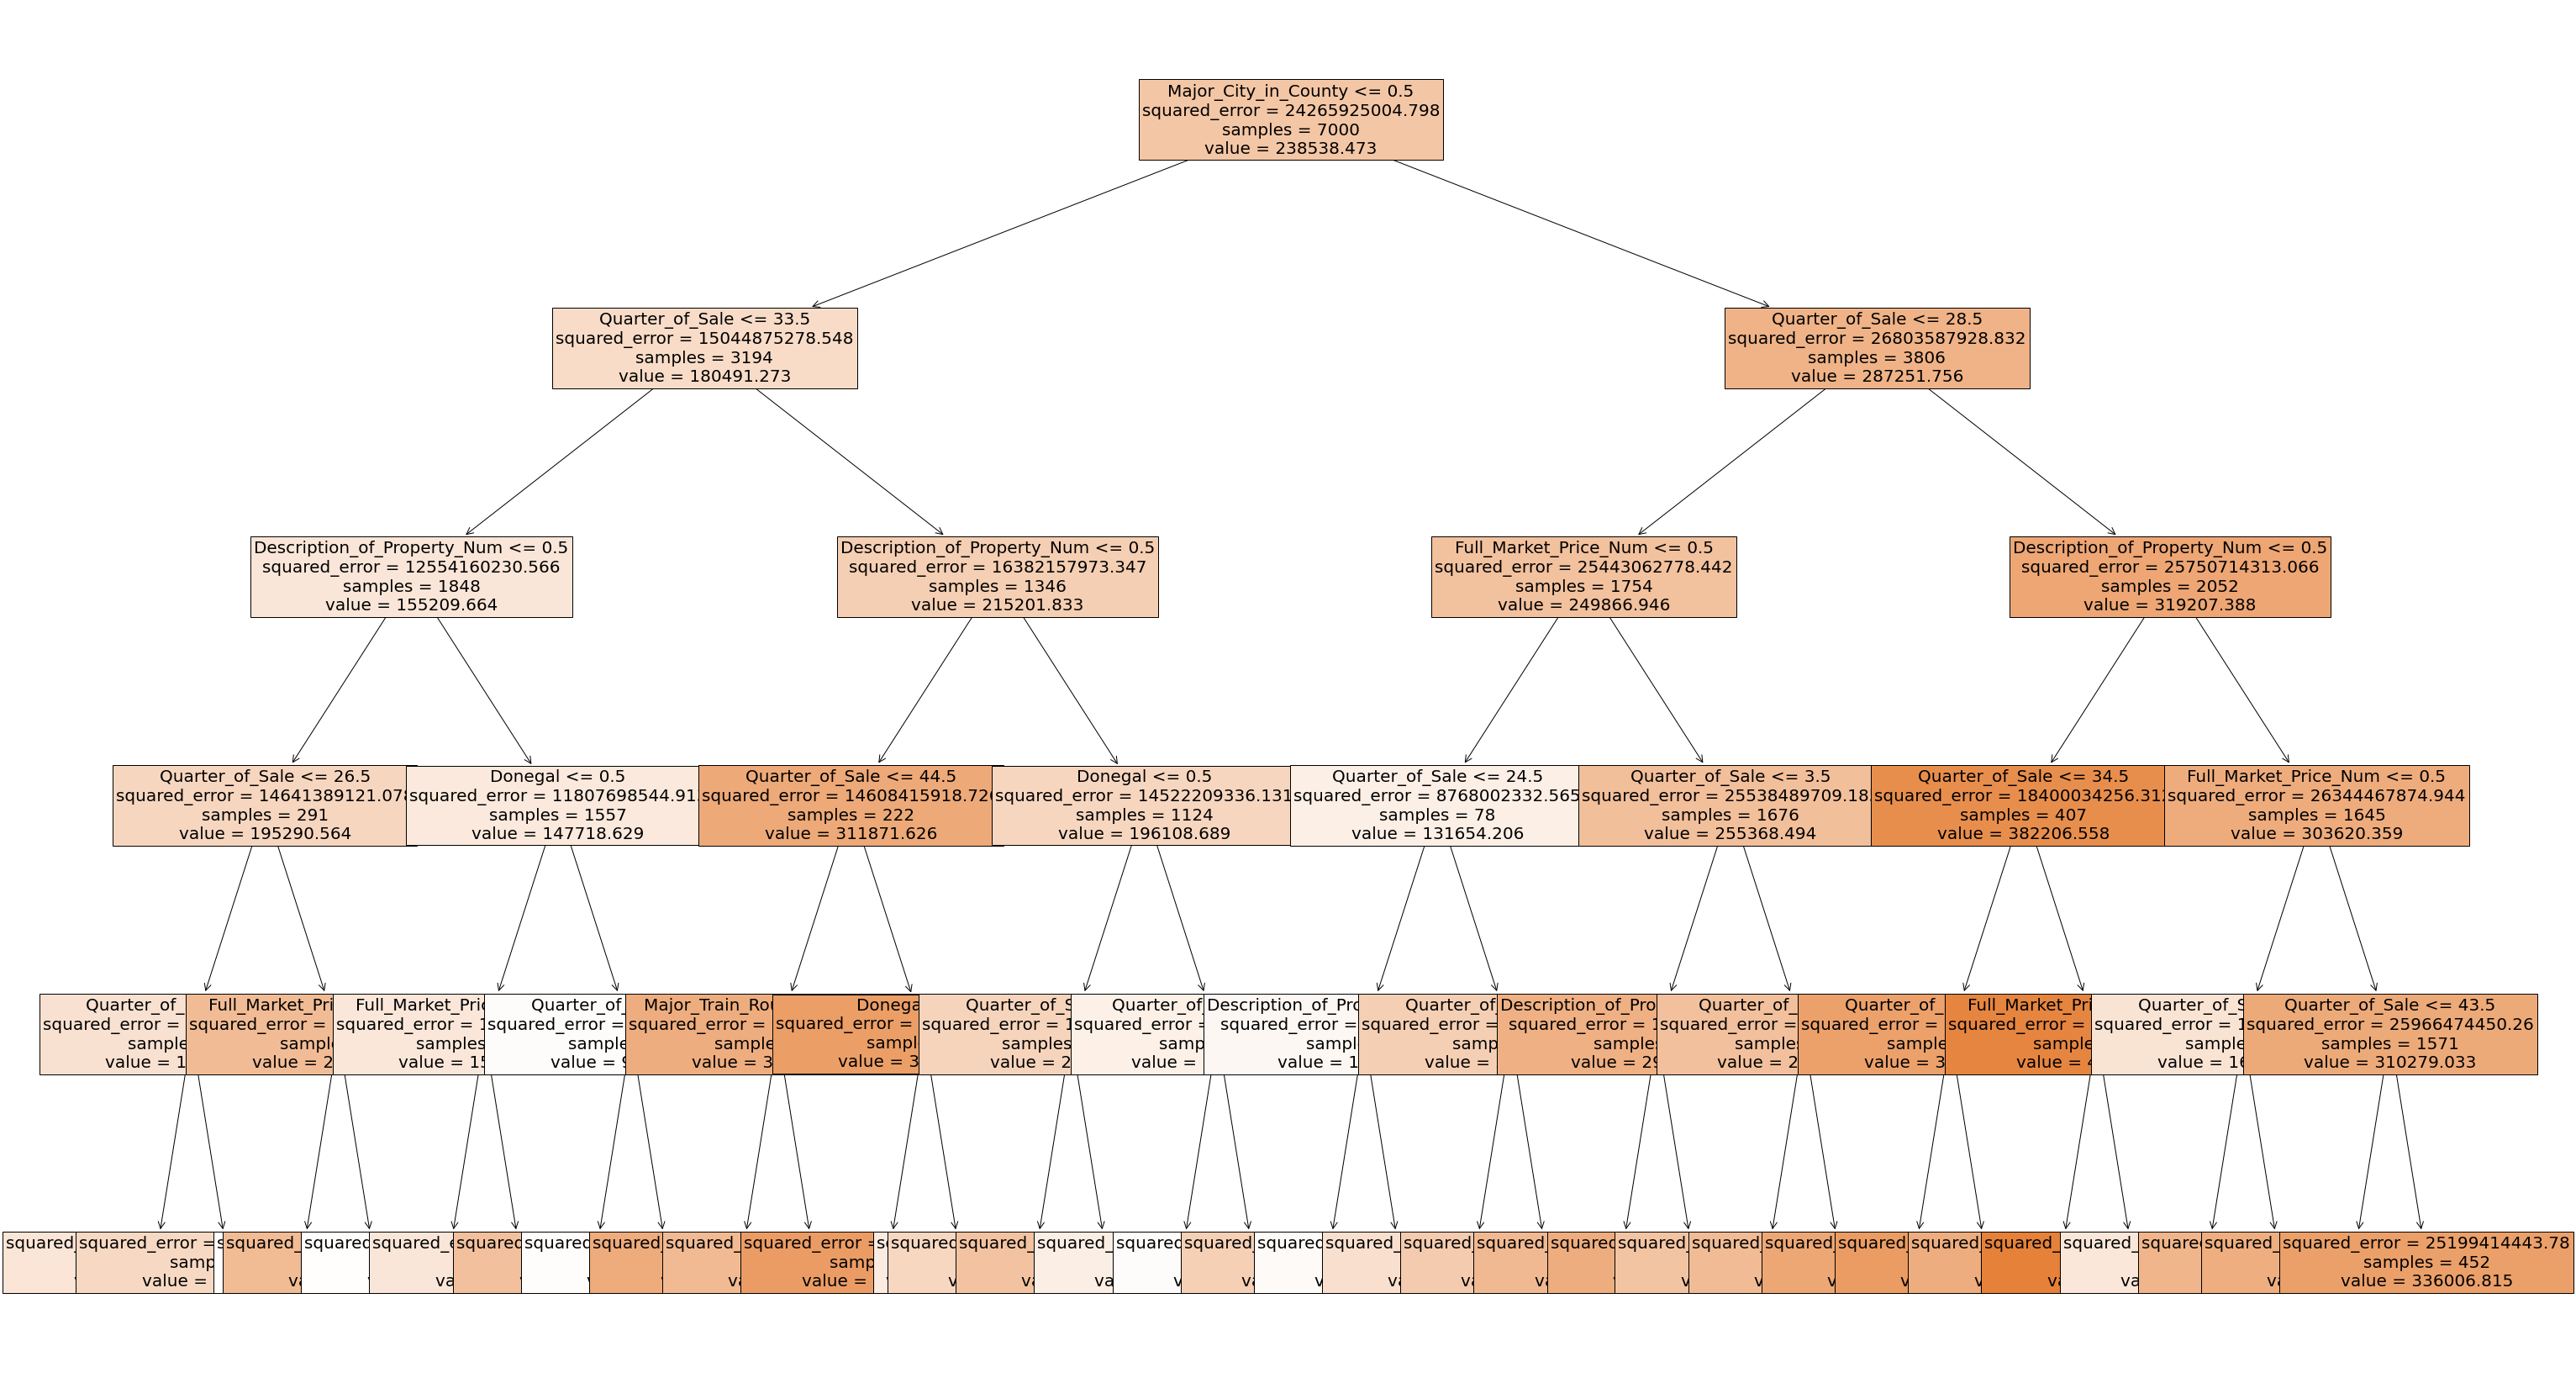

In [269]:
# Create visual plot of decision tree regression model created

fig = plt.figure(figsize=(50,30))
_ = tree.plot_tree(tree_regression, 
                   feature_names=X.columns,  
                   filled=True,
                  fontsize = 20)

### Model Interpretation & Discussion

The decision tree model that is created above is designed to progressively split the data in the tree into different, smaller subsets of the tree by asking yes or no questions to help it arrive at an estimate for the target value, in this case the price. This split is based on the mean-squared error value, which is listed in each node. The regression tree is designed so that each question can split the data in such a way as to progressively minimise the mean standard error value of its estimate for the price feature. Mean standard error here is the measure of impurity at each node in the decision tree, compared to Gini index for a classification tree. The purity of each node is a reference to the homogenity of each node (how similar each item in the node is basically). So as each step in the tree partitions the data, the goal is to make each item in a given node in the tree as similar as possible with overfitting the model. This is the means that the decision tree algorithm is using to create this model and ask its questions in the order that it asks them. 

Regarding the feature importance values in the model, they do not speak necessarily to the predicted value directly the way that the linear regression coefficients did, but more so they refer to the amount of the model's predictive variance or its own weighting for a given feature. For instance, the first question it asks, to see if the house was sold in a county with a major city in it, has an importance of approximately 0.51. This means that 51% of this model's variance is dictated by that feature. To use an analogy, if a government was used to describe this feature importance and each feature was a party, we can say that the major city party has 51% of the seats in government and so 51% of the voting power (to keep things simple). The next biggest party in this case would be the quarter of sale party that has approximately 25% of the seats in government and so 25% of the voting power, and so on. Each of the feature importances are the weighting given to each feature value to determine its importance in predicting the target feature.

While the weighting values and the means that they are used is different between the decision tree algorithm and the linear regression algorithm, it is interesting to see that there are similarities in the feature importance outcomes. For instance, both of these algorithms place a large degree of importance on whether the county that a house was sold in contained a major city in it while they both placed very little importance on the presence of a major train route in the county of the sold property. This could be due to a high correlation between the major train route values and the major city values (which logically would make sense as these major train routes are most likely designed to facilitate travel to these large cities predominantly as well as some additional locations).

### Predicted Vs. Actual Comparisons & Error Measures

Having created the decision tree to predict the value of house prices based on the inputted features, the model then was tested for the degree of error of its predictions by analysing the error measures used for the linear regression model trained above - the MAE, the RMSE and the r^2 value. While these are two different models, they are both addressing the same problem of trying to find the same value in a continuous variable in a common domain. As such, using the same error measures to both compute the amount in euro by which they are erroneous in their predictions and the r^2 value to assess how much better they perform than a prediction based on the average value in a way that provides performance measures that are meaningful both for the models in isolation and to compare the trained models against one another.

#### Predicting values in the training split

In [270]:
# Use decision tree model to predict values in training split and display against actual price values in a dataframe

tree_predictions = tree_regression.predict(X[descriptive_features])

print("\nPredictions with decision tree regression: \n")
actual_vs_predicted_tree = pd.concat([y, pd.DataFrame(tree_predictions, columns=['Predicted'], index=y.index)], axis=1)
print(actual_vs_predicted_tree)


Predictions with decision tree regression: 

         Price      Predicted
9069  170000.0  336006.814978
2603   60000.0  154538.566625
7738  130560.0  135066.214286
1579  248000.0  243465.954905
5058  157500.0  243465.954905
...        ...            ...
5734  365000.0  194535.727453
5191  240000.0  194535.727453
5390   67500.0  194535.727453
860   145000.0  336006.814978
7270  147500.0  194535.727453

[7000 rows x 2 columns]


In [271]:
# Display first 10 values of regression tree predictions dataframe

print(actual_vs_predicted_tree.head(10))

             Price      Predicted
9069  170000.00000  336006.814978
2603   60000.00000  154538.566625
7738  130560.00000  135066.214286
1579  248000.00000  243465.954905
5058  157500.00000  243465.954905
5753  200000.00000   96112.632768
3548  387999.98835  415160.325506
409   212000.00000  154538.566625
4097  620000.00000  299886.757042
6461  182000.00000  336006.814978


In [272]:
# Calculate regression tree error for each entry and add column for these errors to the regression tree predictions
# dataframe

actual_price = []
for price in df_train_clamped['Price']:
    actual_price.append(price)
    
predicted_price = []
for prediction in actual_vs_predicted_tree['Predicted']:
    predicted_price.append(prediction)

prediction_error = []
for i in range(len(actual_price)):
    prediction_error.append(actual_price[i] - predicted_price[i])
    
actual_vs_predicted_tree['PredictionErr'] = prediction_error
actual_vs_predicted_tree

,Price,Predicted,PredictionErr
9069,170000.0,336006.814978,-166006.814978
2603,60000.0,154538.566625,-94538.566625
7738,130560.0,135066.214286,-4506.214286
1579,248000.0,243465.954905,4534.045095
5058,157500.0,243465.954905,-85965.954905
...,...,...,...
5734,365000.0,194535.727453,170464.272547
5191,240000.0,194535.727453,45464.272547
5390,67500.0,194535.727453,-127035.727453
860,145000.0,336006.814978,-191006.814978


In [273]:
# Calculate mean squared error for decision tree predictions

mean_squared_error = 0
for error in prediction_error:
    mean_squared_error += (error**2)

mean_squared_error /= len(prediction_error)
print(f"The mean squared error (MSE) for the decision tree regression model was {mean_squared_error}")

The mean squared error (MSE) for the decision tree regression model was 18724547608.324276


In [274]:
# Calculate root mean squared error for decision tree predictions

root_mean_squared_error = mean_squared_error ** 0.5
print(f"The root mean squared error (RMSE) for the decision tree regression model was {root_mean_squared_error}")

The root mean squared error (RMSE) for the decision tree regression model was 136837.66882084872


In [275]:
# Calculate mean absolute error for decision tree predictions

absolute_errors = []
for error in prediction_error:
    absolute_errors.append(abs(error))

mean_absolute_error = (sum(absolute_errors))/len(absolute_errors)
print(f"The mean absolute error (MAE) for the decision tree regression model was {mean_absolute_error}")

The mean absolute error (MAE) for the decision tree regression model was 105056.06183673431


In [276]:
# Calculate r^2 value for decision tree predictions

r2_score = metrics.r2_score(actual_price, predicted_price)
print(f"The r^2 score the decision tree regression model was {r2_score}")

The r^2 score the decision tree regression model was 0.22836044351815699


Based on the initial output of the error measures for decision tree regression model, the model appears to be ineffective with performance measures similar to that of the linear regression model. While these initial values appear to be slightly better than those achieved by the linear regression model, the error values are both well in excess of €100,000 for the average prediction error regarding both the model's RMSE and MAe and its r^2 value appears to be quite low with a value of approximately 0.23.

#### Predicting values in the test split

In [277]:
# Use decision tree regression model to predict values in test set and create dataframe comparing these
# predictions to the actual price values in the test split

test_predictions = tree_regression.predict(X_test)
print("Actual vs predicted on test:\n", pd.concat([y_test, pd.DataFrame(test_predictions, columns=['Predicted'], index=y_test.index)], axis=1))

Actual vs predicted on test:
          Price      Predicted
6252  232000.0  154538.566625
4684  202500.0  243465.954905
1731  380000.0  336006.814978
4742  425000.0  299886.757042
4521   44000.0   94385.598732
...        ...            ...
8014  620000.0  415160.325506
1074  530000.0  336006.814978
3063  180000.0  194535.727453
6487  620000.0  415160.325506
4705  620000.0  346880.333045

[3000 rows x 2 columns]


In [278]:
# Display the mean absolute error, the root mean squared error and the r^2 value for the test split predictions
# generated by the decision tree

print("Test MAE: " + str(metrics.mean_absolute_error(test_actual_price, test_predictions)))
print("Test RMSE: " + str(metrics.mean_squared_error(test_actual_price, test_predictions)**0.5))
print("Test R^2: " + str(metrics.r2_score(test_actual_price, test_predictions)))

Test MAE: 104585.28321608184
Test RMSE: 135399.8266727251
Test R^2: 0.22075956641920236


The performance measures obtained from examining the test split data confirms the observations made on the performance from the training split predictions, with values that are slightly improved on the linear regression model but are still far from being effective enough to make insightful predictions on the price value of a residential property for sale.

### Cross Validation Testing

The cross validation testing was carried out using the same methods as for the linear regression cross validation testing to again allow for direct comparison between the two models and to maintain a standard size for the test set that was used to generate those values the number of folds was also kept constant.

In [279]:
# Carry out cross validation testing using same metrics (MAE, RMSE and r^2) as for linear regression using 5 folds

scores = cross_validate(DecisionTreeRegressor(random_state = 1, max_depth = 5), X, y, 
                        scoring=cross_validate_measures, cv=5)
scores

{'fit_time': array([0.00498581, 0.0039897 , 0.00299168, 0.00299025, 0.00398922]),
 'score_time': array([0.00202346, 0.0010078 , 0.00199461, 0.00199485, 0.0009973 ]),
 'test_neg_mean_absolute_error': array([-103591.24406244, -108995.71562459, -104848.12273127,
        -109244.70227645, -106930.56587417]),
 'test_neg_root_mean_squared_error': array([-136189.51561917, -141723.65803195, -135802.81438014,
        -139229.97149736, -140215.6452121 ]),
 'test_r2': array([0.2345149 , 0.20489789, 0.2033494 , 0.18866095, 0.20354105])}

In [280]:
# Display the average for each cross validation performance metric from the 5 folds

tree_mae = (sum(scores['test_neg_mean_absolute_error']))/5
tree_rmse = (sum(scores['test_neg_root_mean_squared_error']))/5
tree_r2 = (sum(scores['test_r2']))/5

print("Average MAE over 5 folds: " + str(tree_mae))
print("Average RMSE over 5 folds: " + str(tree_rmse))
print("Average R^2 over 5 folds: " + str(tree_r2))

Average MAE over 5 folds: -106722.07011378421
Average RMSE over 5 folds: -138632.32094814494
Average R^2 over 5 folds: 0.20699284041633445


Once again the cross validation testing here created verified the results obtained for the training and test splits without deviating too much from the results obtained in those initial splits. With error values well above €100,000 on average for the MAE and RMSE and an r^2 value that rounds up to 0.21, we can determine that this model performs slightly better than the linear regression model created in part 2 of this notebook but is still nowhere near a usable model in terms of its accuracy.

What is interesting to note is the greater degree of deviation in the values obtained in the 5 folds used here than with those for the linear regression, specifically regarding the r^2 score of the model. While both models appear to have similar ranges or sizes of difference between their greatest and smallest RMSEs and MAEs from cross validation testing, the r^2 score for the linear regression was far more stable during cross validation testing than that of the linear regression. One hypothesis as to why that occurred relates to the nature of the models themselves. While cross validation of the linear regression could change the overall weights for the different features in the linear regression equation, the overall structure of the equation would have remained constant across all permutations. For the decision tree however, changes in feature values and importances caused by training different subsets of data could have led to a slightly altered order in which some of the questions were asked when splitting the data at each level in the tree, particularly for the smaller feature importance values that had similar importance scores. This change could have made more pronounced effects in the model possible. This is just one hypothesis though and the exact nature of this increased variability is still unclear.

## Part 4 - Random Forest Modelling

The last model that was trained for predicting values in this dataset was a random forest regression model. This model works like an aggregation of decision trees, where typically several decision trees with a random subset of the data and a random subset of the descriptive features used for prediction are selected and then these models are used within a meta decision tree internally that then takes their collective information and is able to create a model that forms predictions based on the input values and their combined / averaged feature importances and question orders. As this model was used for regression like the others, similar performance measures were used for this model, i.e. the MAE, RMSE and the r^2 score. The random forest model also used an out-of-bag accuracy score, or oob score, as a measure of model accuracy that is specific to the random forest model compared to the other models used in this notebook.

### Training Random Forest Model

In [281]:
# Random forest constructor info found at https://towardsdatascience.com/random-forest-regression-5f605132d19d

# Create random forest regression model of 100 decision trees and fit the descriptive features in the training
# split to the price values of the training split

rf_regression = RandomForestRegressor(n_estimators = 100, max_depth = 5, random_state = 18, oob_score = True)
rf_regression.fit(X[descriptive_features], y)

RandomForestRegressor(max_depth=5, oob_score=True, random_state=18)

In [282]:
# Display descriptive features and their importance value in the random forest

print("Features: \n", descriptive_features)
print("Importances: \n", rf_regression.feature_importances_)

Features: 
 ['Quarter_of_Sale', 'Major_Train_Route_Num', 'Description_of_Property_Num', 'Full_Market_Price_Num', 'Major_City_in_County', 'Donegal']
Importances: 
 [0.27538857 0.00368209 0.12685362 0.08277733 0.49444623 0.01685215]


In [283]:
# Create a dataframe to display the features used in the random forest and their importance in descending order
# of importance

feature_importance = pd.DataFrame({'feature': X.columns, 'importance':rf_regression.feature_importances_})
feature_importance.sort_values('importance', ascending=False)

,feature,importance
4,Major_City_in_County,0.494446
0,Quarter_of_Sale,0.275389
2,Description_of_Property_Num,0.126854
3,Full_Market_Price_Num,0.082777
5,Donegal,0.016852
1,Major_Train_Route_Num,0.003682


### Model Interpretation & Discussion

Given that the random forest regressor is a collection of decision trees and not just one tree as above, it cannot be visualised in the same way that a single decision tree can be. However, from what was learnt through the decision tree, similar insights can be gleamed into the output for the feature importances of the random forest. The random forest created here has similar but slightly altered feature importances to that of the single decision tree created in part 3. This is because the random forest created here is a collection of 100 different individual decision trees created on different subsets of the sample data provided. As such, the feature importances displayed here can be seen as something like the average of the feature importances for each of these different features within their own individual decision trees. 

It should be noted that in most random forests, one would not only want to bootstrap the sample data (i.e. take a random subsection of the data) but also randomise the features used for prediction. However, given that there were a relatively small number of samples used in this data it was decided against limiting the number of features further in any of the decision trees used to create this random forest regressor. This led to a dominance of the major city in county feature that, while present in the original decision tree model, may not have been so clearly dominant if a random number of features had been implemented.

What is clear is that even with an aggregation of multiple decision trees, the two dominant features in this model are the presence of a major city in the county where a property was sold as well as the quarter in which a property was sold. All other features are accounting for less than a quarter of the predictive decision making done by this model while the rest is governed by those first two features mentioned here.

### Predicted Vs. Actual Comparisons & Error Measures

As with the other two models that have been created thus far, this model was again evaluated on both its training and test splits to assess the degree of error in its predictions and then cross validation was carried out on the obtained values to verify the performance of the model. The same three error measures were used as before to again create a means of quantifying the degree of error both using the same units as in this domain and without relying on those units while then simulataneously allowing all three models to be compared directly to one another.

The random forest model was also assessed for its out of the bag accuracy score or oob score. This value, as described in the article https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710, is similar in some regards to the reasoning behind cross validation. Given that random forest models use a technique called bootstrapping to train their models on a subset of the data in the dataframe and then create an overall model from the specified number of trained models (in this case 100 decision trees) by majority voting based on the results of those individual decision trees. The out of bag score tests the accuracy of the trained model against the unseen 'test' values left over from its training i.e. the rows in the sample that were not included for training each iteration of the model. This score is unique to this model relative to the other two created here as the random forest is the only ensemble method used here (an ensemble method or learning algorithm is one that combines the results of several individual learning algorithms to create more accurate predictions). Given that this model was the only one to partition the dataset during training, it is the only model that is suitable for oob score calculations.

#### Predicting values in the training split

In [284]:
# Use the random forest model to predict the price values for the training split

forest_predictions = rf_regression.predict(X[descriptive_features])

# Create dataframe to compare the random forest predictions to actual obtained values and display them

print("\nPredictions with random forest regression: \n")
actual_vs_predicted_forest = pd.concat([y, pd.DataFrame(forest_predictions, columns=['Predicted'], index=y.index)], axis=1)
print(actual_vs_predicted_forest)


Predictions with random forest regression: 

         Price      Predicted
9069  170000.0  334643.437576
2603   60000.0  148504.298701
7738  130560.0  138287.653367
1579  248000.0  247770.036447
5058  157500.0  242820.255426
...        ...            ...
5734  365000.0  196752.792889
5191  240000.0  192769.580504
5390   67500.0  197886.537342
860   145000.0  332167.457482
7270  147500.0  205429.744140

[7000 rows x 2 columns]


In [285]:
# Display first 10 values in the forest regression predictions dataframe

print(actual_vs_predicted_forest.head(10))

             Price      Predicted
9069  170000.00000  334643.437576
2603   60000.00000  148504.298701
7738  130560.00000  138287.653367
1579  248000.00000  247770.036447
5058  157500.00000  242820.255426
5753  200000.00000  145451.385062
3548  387999.98835  414515.338284
409   212000.00000  154511.780845
4097  620000.00000  309050.844393
6461  182000.00000  334330.118597


In [286]:
# Calculate the error in the random forest predictions and add each error in an error column in the forest
# predictions dataframe

actual_price = []
for price in df_train_clamped['Price']:
    actual_price.append(price)
    
predicted_price = []
for prediction in actual_vs_predicted_forest['Predicted']:
    predicted_price.append(prediction)

prediction_error = []
for i in range(len(actual_price)):
    prediction_error.append(actual_price[i] - predicted_price[i])
    
actual_vs_predicted_forest['PredictionErr'] = prediction_error
actual_vs_predicted_forest

,Price,Predicted,PredictionErr
9069,170000.0,334643.437576,-164643.437576
2603,60000.0,148504.298701,-88504.298701
7738,130560.0,138287.653367,-7727.653367
1579,248000.0,247770.036447,229.963553
5058,157500.0,242820.255426,-85320.255426
...,...,...,...
5734,365000.0,196752.792889,168247.207111
5191,240000.0,192769.580504,47230.419496
5390,67500.0,197886.537342,-130386.537342
860,145000.0,332167.457482,-187167.457482


In [287]:
# Calculate the mean squared error for the random forest regression model

mean_squared_error = 0
for error in prediction_error:
    mean_squared_error += (error**2)

mean_squared_error /= len(prediction_error)
mean_squared_error

18564894482.300304

In [288]:
# Calculate the root mean squared error for the random forest regression model

root_mean_squared_error = mean_squared_error ** 0.5
root_mean_squared_error

136253.05311184886

In [289]:
# Calculate the mean absolute error for the random forest regression model

absolute_errors = []
for error in prediction_error:
    absolute_errors.append(abs(error))

mean_absolute_error = (sum(absolute_errors))/len(absolute_errors)
mean_absolute_error

104434.76966499933

In [290]:
# Display the r^2 score the random forest regression model

print(metrics.r2_score(actual_price, predicted_price))

0.2349397569377879


After calculating the performance of the random forest model using the same error metrics as for the previous regression models, it appears that the random forest model has marginally superior performance compared to the other regression models. However, with domain-based errors that still average well in excess of €100,000 and an r^2 value that rounds down to 0.23, this model is also not nearly accurate enough in its current state to be of effective use to someone based on these results.

#### Predicting values in the test split

In [291]:
# Use the trained random forest model to predict the price values of the rows in the test split
# Create a dataframe to hold the actual price values in the test split and the random forest's generated
# predictions

test_predictions = rf_regression.predict(X_test)
print("Actual vs predicted on test:\n", pd.concat([y_test, pd.DataFrame(test_predictions, columns=['Predicted'], index=y_test.index)], axis=1))

Actual vs predicted on test:
          Price      Predicted
6252  232000.0  148504.298701
4684  202500.0  247355.018236
1731  380000.0  334643.437576
4742  425000.0  298432.770376
4521   44000.0  104515.401813
...        ...            ...
8014  620000.0  409562.976138
1074  530000.0  334643.437576
3063  180000.0  194236.667369
6487  620000.0  402167.522840
4705  620000.0  346740.838132

[3000 rows x 2 columns]


In [292]:
# Display the mean absolute error, the root mean squared error and the r^2 value for the random forest
# predictions for the test split prices

print("Test MAE: " + str(metrics.mean_absolute_error(test_actual_price, test_predictions)))
print("Test RMSE: " + str(metrics.mean_squared_error(test_actual_price, test_predictions)**0.5))
print("Test R^2: " + str(metrics.r2_score(test_actual_price, test_predictions)))

Test MAE: 103853.25817550452
Test RMSE: 134552.63456416503
Test R^2: 0.23048042120890244


The error metrics for the random forest model predictions based on the test data are equivocal to those of the training split, verifying the integrity of those results. This further demonstrates that in its current condition the random forest model is not usable as a prediction model.

### Cross Validation Testing

As with the previous regression models, the same k = 5 folds was used for k-folds cross validation testing when assessing the random forest model. As before, this was done to make comparisons between the different regression models produced in this notebook stronger and speak more directly to the differences in the models themselves rather than any differences in their assessment.

In [293]:
# Run cross validation testing using the same metrics as previous cross validation testing on the
# random forest using 5 folds
# Display the performance metric values obtained for each of the 5 folds

scores = cross_validate(RandomForestRegressor(n_estimators = 100, max_depth = 5, random_state = 18, 
                                              oob_score = True), X, y, 
                                            scoring=cross_validate_measures, cv=5)
scores

{'fit_time': array([0.25234127, 0.21387887, 0.20894837, 0.21096897, 0.21593952]),
 'score_time': array([0.0121634 , 0.01197553, 0.0119679 , 0.01197004, 0.01214051]),
 'test_neg_mean_absolute_error': array([-102738.17888027, -108361.47267055, -103981.62375831,
        -107550.82321537, -106559.87937522]),
 'test_neg_root_mean_squared_error': array([-135266.48872559, -141272.53254293, -135114.00300001,
        -137597.70172631, -139756.71012376]),
 'test_r2': array([0.24485592, 0.20995167, 0.21141036, 0.20757298, 0.20874625])}

In [294]:
# Display the average values for the performance metrics from the cross validation testing for the random
# forest regression
rf_mae = (sum(scores['test_neg_mean_absolute_error']))/5
rf_rmse = (sum(scores['test_neg_root_mean_squared_error']))/5
rf_r2 = (sum(scores['test_r2']))/5

print("Average MAE over 5 folds: " + str(rf_mae))
print("Average RMSE over 5 folds: " + str(rf_rmse))
print("Average R^2 over 5 folds: " + str(rf_r2))

Average MAE over 5 folds: -105838.39557994522
Average RMSE over 5 folds: -137801.4872237199
Average R^2 over 5 folds: 0.2165074370396148


While the cross-validation testing produced lower average scores for the error measures employed in this assessment of the random forest model, the random forest's values are still the best relative to the other regression models produced in this notebook after cross validation, even if only by a very slight margin. Once again, these results are not largely different from those obtained from initial testing of the random forest model on the training and test split, if anything these scores are slightly poorer than those initial assessments. This again reinforces the previous observation that this model is not currently in a condition to be feasible for generating real-world predictions.

In [295]:
# Display the random forest out-of-bag score

rf_regression.oob_score_

0.2201279753044746

The out of bag score created for this random forest model that was initially trained has a value of approximately 0.22. This value represents the number of correctly predicted values in the data based using the predictions created in this model. While the nature of the model is unlikely to ever correctly predict one specific value for a value created using regression as the variable is continuous and is too subject to change for exact predictions to be possible without grossly overfitting the model, it is an indication of the accuracy of the model. A score of 0.22 represents an accuracy of 22% or that 22% of the entries in the test section or essentially the unused samples during model training can be accurately identified (or at least close enough for the model to classify this as an accurate prediction) using this model.

## Part 5 - Improving Predictive Models

### 5A - Assessing the best predictive model

In order to plainly assess which of the predictive models had the strongest performance based on their error measures that were common to all three, a dataframe object was created to house the values for each different model to make a direct comparison between quick and easy to carry out.

In [296]:
# Create lists to hold each pre-calculated error measure for each model as well as the model types
# Create dataframe object

mae_values = [linreg_mae, tree_mae, rf_mae]
rmse_values = [linreg_rmse, tree_rmse, rf_rmse]
r2_values = [linreg_r2, tree_r2, rf_r2]
model_names = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression']

cross_validation_score_df = pd.DataFrame(data = model_names, columns=['Model Names'])
cross_validation_score_df

,Model Names
0,Linear Regression
1,Decision Tree Regression
2,Random Forest Regression


In [297]:
# Add each of the error score values to the dataframe for each model

cross_validation_score_df['MAE Values'] = mae_values
cross_validation_score_df['RMSE Values'] = rmse_values
cross_validation_score_df['R2 Values'] = r2_values
cross_validation_score_df

,Model Names,MAE Values,RMSE Values,R2 Values
0,Linear Regression,-107504.789475,-139170.117860,0.200909
1,Decision Tree Regression,-106722.070114,-138632.320948,0.206993
2,Random Forest Regression,-105838.395580,-137801.487224,0.216507


After adding the average values from cross validation testing for the performance of the model in predicting values from the training split, it is clear that while there is little difference between the models, the random forest regression model outperformed the other two models based on all three metrics used for testing and so this was the model selected for further assessment in this part of the notebook.

The next piece of analysis is to assess the performance of the model selected, the random forest model, against the performance of guessing the average price for the year that the property was sold in. The r^2 score can be used for this as it compares the performance versus guessing the average value for a given dataset. To carry out this analysis, subsections of the training split (as specified in the assignment brief section 5.1) were created for each year of property sales and then the r^2 score was computed between predictions generated by the model and the actual price values for that year.

In [298]:
# Create sequence of price values for given year in the training split

prices_2010 = df_train_clamped['Price'][df_train_clamped['Year_of_Sale'] == 2010]

In [299]:
# Create dataframe containing price values for 2010

df_prices_2010 = pd.DataFrame(np.asarray(prices_2010), columns=['Actual Price'])
df_prices_2010

,Actual Price
0,150000.0
1,235000.0
2,565000.0
3,407500.0
4,120000.0
...,...
286,190000.0
287,130000.0
288,225000.0
289,226000.0


In [300]:
# Use random forest trained model to predict price values for the year 2010

rf_2010_predictions = rf_regression.predict(X[descriptive_features][df_train_clamped['Year_of_Sale'] == 2010])
rf_2010_predictions

array([107621.37304402, 248739.05918339, 302457.0287809 , 281062.73170254,
       184549.88579511, 248739.05918339, 179376.23414107, 281062.73170254,
       179376.23414107, 179376.23414107, 177689.39741892, 281062.73170254,
       173225.54996349, 184549.88579511, 248739.05918339, 177689.39741892,
       270599.74656556, 248739.05918339, 248739.05918339, 302457.0287809 ,
       184549.88579511, 183855.30253208, 167203.38252509, 113737.54794224,
       204898.68482865, 248739.05918339, 248739.05918339, 179466.28137022,
       173225.54996349, 248739.05918339, 177689.39741892, 179376.23414107,
       184549.88579511, 173225.54996349, 179376.23414107, 200600.83343986,
       107621.37304402, 184549.88579511, 299136.49055438, 281062.73170254,
       173225.54996349, 299136.49055438, 302457.0287809 , 281706.84434746,
       183855.30253208, 177689.39741892, 173225.54996349, 179376.23414107,
       179466.28137022, 179376.23414107, 177689.39741892, 281706.84434746,
       248739.05918339, 2

In [301]:
# Add predicted prices to the 2010 dataframe

df_prices_2010['Predicted Price'] = rf_2010_predictions

In [302]:
# Check that dataframe was updated correctly

df_prices_2010

,Actual Price,Predicted Price
0,150000.0,107621.373044
1,235000.0,248739.059183
2,565000.0,302457.028781
3,407500.0,281062.731703
4,120000.0,184549.885795
...,...,...
286,190000.0,173225.549963
287,130000.0,179376.234141
288,225000.0,173225.549963
289,226000.0,179376.234141


In [303]:
# Calculate r^2 value for the 2010 predictions and display it

r2_2010 = metrics.r2_score(np.asarray(prices_2010), rf_2010_predictions)
r2_2010

0.18127664312952008

Having checked the value for 2010 we can conclude that the random forest model performs better than predicting the average value for the price of that year. When our model scores an r^2 value greater than 0 we can conclude that the model performs better than this imaginary model that is predicting the average value in every instance. While our model is performing better than the average model for the r^2 score, it is still not providing much more benefit than the average model prediction and demonstrates the need for further improvements to the model.

While the r^2 value can be artificially improved by continuously adding features (see week 10 - lecture 14, slide 28) given that there are a small number of features used in the model it does not appear that the model's r^2 score was in any way inflated by the feature count although adding a significant number of features may warrant evaluation using an adjusted r^2 score in the future.

Once the method for evaluating the performance of the model versus the yearly average prediction was established, this method was repeated for all of the subsequent years in the dataset.

In [304]:
# Create function to calculate r2 score for given year against rf regression model
# Does not create dataframe but calculates just the r2 score specifically

def test_yearly_r2(year):
    yearly_prices = np.asarray(df_train_clamped['Price'][df_train_clamped['Year_of_Sale'] == year])
    rf_yearly_predictions = rf_regression.predict(X[descriptive_features][df_train_clamped['Year_of_Sale'] == year])
    r2_yearly = metrics.r2_score(yearly_prices, rf_yearly_predictions)
    return r2_yearly

In [305]:
# Calculate r2 score for each year in the dataset (except 2010, which has already been calculated previously)

for i in range(2011, 2023):
    r2 = test_yearly_r2(i)
    print(f"The r2 score for year {i} = {r2}")

The r2 score for year 2011 = 0.09488648421423918
The r2 score for year 2012 = 0.16513155009927083
The r2 score for year 2013 = 0.140690012257221
The r2 score for year 2014 = 0.15563088407377923
The r2 score for year 2015 = 0.14420645920382869
The r2 score for year 2016 = 0.14665844551834561
The r2 score for year 2017 = 0.22089640022722057
The r2 score for year 2018 = 0.22238490952424594
The r2 score for year 2019 = 0.24868277823222507
The r2 score for year 2020 = 0.26765298813221305
The r2 score for year 2021 = 0.19441758091426264
The r2 score for year 2022 = 0.6102364098548877


Based on the above output we can see that the random forest model outperforms a prediction based on solely the average value for a given year in every instance. For the year 2011, the r2 value was noticeably lower than for other yearly values and may merit further investigation by calculating the r2 value with the test split values also examined together to see if this is a feature unique to this training / testing split or if there is a particular issue with the year 2011 in the assessment. The year 2022 also has a much larger r2 score than the other year values. However, the year 2022 also had an incomplete number of values present in the dataset (by incomplete it is meant that the year 2022 only had 2-3 months of data collected for the entire rppr dataset, so the amount of property sales present in this sample for the year 2022 was drastically smaller than for other years in this dataset). As such, this r2 should not be treated as an accurate reflection of the model's predictive power for properties in the year 2022 at this time.

### 5B - Improving the Current Predictive Model Further

In their current states, none of the three predictive models created to predict the house price of a property based on the time of sale, its location and other factors included in the model are able to predict the sale price of a property to an accurate enough degree to be able to be used with much efficacy. Having said this, the random forest regression model has the smallest average error margins based on the computed metrics (MAE and RMSE) and offers the greatest advantage in accuracy over the other two models based on their associated r2 values.

Having undertaken this analysis, it is clear that there are not enough features present in the dataset to be able to create accurate model predictions. Given that this problem is a regression problem and not a classification, a greater number of features may be necessary to create a more effective solution. The logic behind this idea is simple - for a classification there are a limited number of outputs that one is potentially trying to find an answer within while with a regression problem for a continuous problem, there are essentially infinite possible answers. Given that this problem deals with regression to predict a continuous variable, more features are needed in order to make more fine-tuned adjustments based on the data within each feature. For a model with only 6 or 7 features, for a linear regression model as an example, that model will struggle to be able to make fine-tuned adjustments based on the data and not swing wildly between values representing potentially over €100,000 in this case. This makes it very difficult to get consistent, accurate predictions. As such one of the most obvious ways to improve the accuracy of this model would be the addition of more features. Including each individual county feature would be a prime candidate for improving the model this way, simply by allowing for more specific regional information for each location.

Another issue that could be resolved is the imbalanced nature of much of the data in the dataset. Multiple features that were included in the dataset were composed of imbalanced features with large discrepancies in their representation. Using oversampling techniques to remedy this would improve the impact that these imbalanced features had on the models and thus most likely improve their accuracy.

#### Trying to oversample data

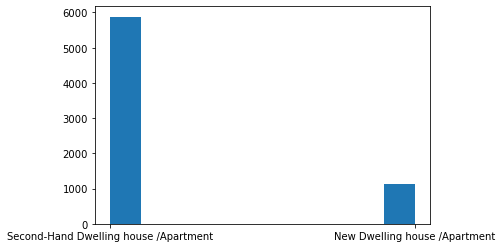

In [306]:
plt.hist(df_train_clamped['Description_of_Property'])
plt.show()

In [307]:
df_train_clamped.columns

Index(['Year_of_Sale', 'Post_Code_or_County', 'Month_of_Sale', 'Address',
       'Major_Train_Route', 'County', 'Price', 'Not_Full_Market_Price',
       'Description_of_Property', 'Quarter_of_Sale', 'Major_Train_Route_Num',
       'Description_of_Property_Num', 'Full_Market_Price_Num',
       'Post_Code_or_County_Encoded', 'Major_City_in_County', 'Dublin',
       'Laois', 'Donegal', 'Cork', 'Galway', 'Wicklow', 'Leitrim', 'Wexford',
       'Monaghan', 'Clare', 'Westmeath', 'Mayo', 'Limerick', 'Waterford',
       'Meath', 'Kerry', 'Roscommon', 'Tipperary', 'Sligo', 'Kilkenny',
       'Cavan', 'Louth', 'Kildare', 'Carlow', 'Offaly', 'Longford'],
      dtype='object')

In [308]:
df_train_clamped_features = df_train_clamped.copy()

In [309]:
df_train_clamped_features.drop('Post_Code_or_County', axis=1, inplace=True)
df_train_clamped_features.drop('Address', axis=1, inplace=True)
df_train_clamped_features.drop('Major_Train_Route', axis=1, inplace=True)
df_train_clamped_features.drop('County', axis=1, inplace=True)
df_train_clamped_features.drop('Not_Full_Market_Price', axis=1, inplace=True)
df_train_clamped_features.drop('Description_of_Property', axis=1, inplace=True)

In [310]:
df_train_clamped_features

,Year_of_Sale,Month_of_Sale,Price,Quarter_of_Sale,Major_Train_Route_Num,Description_of_Property_Num,Full_Market_Price_Num,Post_Code_or_County_Encoded,Major_City_in_County,Dublin,...,Roscommon,Tipperary,Sligo,Kilkenny,Cavan,Louth,Kildare,Carlow,Offaly,Longford
9069,2021,9,170000.0,47,1,1,1,27,1,1,...,0,0,0,0,0,0,0,0,0,0
2603,2014,2,60000.0,17,0,1,1,33,0,0,...,0,0,0,0,0,0,0,0,0,0
7738,2019,7,130560.0,39,0,1,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1579,2011,1,248000.0,5,1,1,1,4,1,0,...,0,0,0,0,0,0,0,0,0,0
5058,2011,9,157500.0,7,1,1,1,6,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2019,5,365000.0,38,0,1,1,31,0,0,...,0,0,0,0,0,0,1,0,0,0
5191,2018,5,240000.0,34,0,1,1,41,0,0,...,0,0,0,0,0,0,0,0,1,0
5390,2020,12,67500.0,44,0,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
860,2020,11,145000.0,44,1,1,1,4,1,0,...,0,0,0,0,0,0,0,0,0,0


In [311]:
df_train_clamped_features.columns

Index(['Year_of_Sale', 'Month_of_Sale', 'Price', 'Quarter_of_Sale',
       'Major_Train_Route_Num', 'Description_of_Property_Num',
       'Full_Market_Price_Num', 'Post_Code_or_County_Encoded',
       'Major_City_in_County', 'Dublin', 'Laois', 'Donegal', 'Cork', 'Galway',
       'Wicklow', 'Leitrim', 'Wexford', 'Monaghan', 'Clare', 'Westmeath',
       'Mayo', 'Limerick', 'Waterford', 'Meath', 'Kerry', 'Roscommon',
       'Tipperary', 'Sligo', 'Kilkenny', 'Cavan', 'Louth', 'Kildare', 'Carlow',
       'Offaly', 'Longford'],
      dtype='object')

In [312]:
oversample = imblearn.over_sampling.SMOTE()

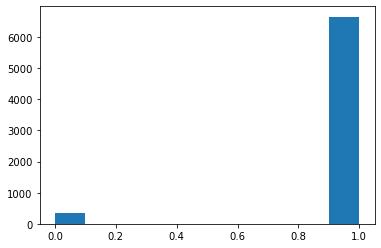

In [313]:
plt.hist(df_train_clamped_features['Full_Market_Price_Num'])
plt.show()

In [314]:
descriptive_features = ['Price','Quarter_of_Sale',
       'Major_Train_Route_Num', 'Description_of_Property_Num',
       'Full_Market_Price_Num',
       'Major_City_in_County', 'Dublin', 'Laois', 'Donegal', 'Cork', 'Galway',
       'Wicklow', 'Leitrim', 'Wexford', 'Monaghan', 'Clare', 'Westmeath',
       'Mayo', 'Limerick', 'Waterford', 'Meath', 'Kerry', 'Roscommon',
       'Tipperary', 'Sligo', 'Kilkenny', 'Cavan', 'Louth', 'Kildare', 'Carlow',
       'Offaly', 'Longford']

In [315]:
df_train_clamped_features = df_train_clamped_features[descriptive_features]

In [316]:
df_train_clamped_features

,Price,Quarter_of_Sale,Major_Train_Route_Num,Description_of_Property_Num,Full_Market_Price_Num,Major_City_in_County,Dublin,Laois,Donegal,Cork,...,Roscommon,Tipperary,Sligo,Kilkenny,Cavan,Louth,Kildare,Carlow,Offaly,Longford
9069,170000.0,47,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2603,60000.0,17,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7738,130560.0,39,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1579,248000.0,5,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5058,157500.0,7,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,365000.0,38,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5191,240000.0,34,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5390,67500.0,44,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,145000.0,44,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [317]:
# df_train_clamped_oversample = smogn.smoter(data=df_train_clamped_features, y='Price')

As an aside here, due to difficulties in correctly implementing oversampling on the dataframe for the training split in order to improve predictive model performance, this operation unfortunately had to be omitted from the sumbission. However, it is reasonable to suggest that resolving the large imbalance issues present in certain features (such as the property description feature and the full market price feature) might have improved the outcome of the predictive power of the models created in this notebook. Furthermore, without being able to resolve these issues it is inadvisable to add individual counties as features to the predictive model as many of these counties have very large discrepancies between them regarding the number of properties registered as sold within that county. As such these are prudent theoretical solutions but given the encroaching deadline and issues with dependencies it was deemed necessary to move on without implementing this solution. 

This solution was deemed the best way to improve the performance of all models but there were also other solutions that may have been applied had the assignment been completed on schedule. For instance, the decision trees and random forests could have been more closely examined and evaluated using cross validation with multiple tree depths to determine the optimal tree depth for each, thereby improving their accuracy, regardless of the number of features in the model. Also should the county features have been added successfully, the features themselves might have demonstrated varying degrees of importance to the point that some of the features could have eventually been dropped to eliminate some of the noise in the model and create superior predictions. While it is unfortunate that these solutions were not implemented on time, it is important to mention as necessary steps in order to bring the model up to an efficacy that would make it suitable for practical application.

### 5C - Evaluate Model on New Dataset

At this final stage of the evaluation, new data was read into the notebook and used to test the efficacy of this modelling on the new data using the most effective model so far. At this point, the random forest regression model has proven to be the most effective in making its predictions so this model was elected to be used to make predictions for the house price values based on the new dataset. 

First the new dataset was read into a dataframe and some initial cleaning and preparation was quickly carried out on it in order for the predictive model to be able to use its information - essentially it was put through the same process as the initial test dataset preparation at the end of section 1.

In [318]:
new_df = pd.read_csv('22032022-PPR-Price-recent.csv', keep_default_na = True, delimiter=',', skipinitialspace = True)

In [319]:
new_df

,DateofSale(dd/mm/yyyy),Address,PostalCode,County,Price(€),NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription
0,2022-01-15,"24 FOREST WALK, SWORDS, DUBLIN",NaN,Dublin,154000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
1,2022-01-15,"5 CRAGAUN, FATHER RUSSELL ROAD, DOORADOYLE",NaN,Limerick,370000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
2,2022-01-16,"19 The Lawn, Mullen Park, Maynooth",NaN,Kildare,409691.63,No,Yes,New Dwelling house /Apartment,NaN
3,2022-01-16,"MONTEVIDEO, HOSPITAL HILL, BUNCLODY",NaN,Wexford,100000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
4,2022-01-17,"1 CILL BEG MANOR, STRADBALLY, LAOIS",NaN,Laois,225000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
...,...,...,...,...,...,...,...,...,...
7177,2022-03-11,"LISREAGH, LISREAGH, CAVAN",NaN,Cavan,175000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
7178,2022-03-11,"MIDDLE MAIN STREET, CASTLEREA, CO ROSCOMMON",NaN,Roscommon,122000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
7179,2022-03-11,"NO 1 THE HYNES BUILDING, PORTUMNA, CO GALWAY",NaN,Galway,11250.90,Yes,No,Second-Hand Dwelling house /Apartment,NaN
7180,2022-03-11,"TALLAGH HILL, BELMULLET, MAYO",NaN,Mayo,169750.00,No,No,Second-Hand Dwelling house /Apartment,NaN


In [320]:
# Note that price is excluded from this first alteration as more work was done to clean that feature
# Each datatype was assigned individually

new_df['DateofSale(dd/mm/yyyy)'] = new_df['DateofSale(dd/mm/yyyy)'].astype('datetime64[ns]')
new_df['Address'] = new_df['Address'].astype('category')
new_df['PostalCode'] = new_df['PostalCode'].astype('category')
new_df['County'] = new_df['County'].astype('category')
new_df['NotFullMarketPrice'] = new_df['NotFullMarketPrice'].astype('category')
new_df['VATExclusive'] = new_df['VATExclusive'].astype('category')
new_df['DescriptionofProperty'] = new_df['DescriptionofProperty'].astype('category')
new_df['PropertySizeDescription'] = new_df['PropertySizeDescription'].astype('category')

In [321]:
# Alter current column titles to make them match trained model

new_df.columns = ['Date', 'Address', 'Postal_Code', 'County', 'Price', 'Not_Full_Market_Price',
                  'VAT_Exclusive', 'Description_of_Property', 'Property_Size_Description']

In [322]:
# Check datatypes

new_df.dtypes

Date                         datetime64[ns]
Address                            category
Postal_Code                        category
County                             category
Price                               float64
Not_Full_Market_Price              category
VAT_Exclusive                      category
Description_of_Property            category
Property_Size_Description          category
dtype: object

In [323]:
# Check for duplicate rows

new_df.duplicated().sum()

17

In [324]:
# Drop duplicates. Additional checks unnecessary as data is solely for testing purposes so small loss from dataframe
# unlikely to have a very large effect on the testing outcome

new_df.drop_duplicates(inplace=True)

In [325]:
new_df.drop('Property_Size_Description', axis=1, inplace=True)

In [326]:
# Extract year and month data from the date feature and insert into the dataframe

year = new_df['Date'].dt.year
month = new_df['Date'].dt.month
new_df.insert(loc=1, column='Year_of_Sale', value=year)
new_df.insert(loc=2, column='Month_of_Sale', value=month)

# Drop the date feature as no longer necessary with year and month features
new_df.drop('Date', axis=1, inplace=True)

# Update new features to be continuous data types
new_df['Year_of_Sale'] = new_df['Year_of_Sale'].astype('float')
new_df['Month_of_Sale'] = new_df['Month_of_Sale'].astype('float')

In [327]:
# Loop over the dataframe itself, adding VAT to each of the VAT Exclusive properties

for idx, row in new_df.iterrows():
    if row['VAT_Exclusive'] == 'Yes':
        new_df.at[idx, 'Price'] = row['Price'] * 1.135

In [328]:
# Drop the now redundant VAT Exclusive feature

new_df.drop('VAT_Exclusive', axis=1, inplace=True)

In [329]:
train_bools = []
train_bools_yes_counties = ['Dublin', 'Galway', 'Wexford', 'Mayo', 'Kerry', 'Sligo', 'Cork', 'Limerick', 'Waterford']

for county in new_df['County']:
    if county in train_bools_yes_counties:
        train_bools.append('Yes')
    else:
        train_bools.append('No')

In [330]:
new_df.insert(4, 'Major_Train_Route', train_bools)
new_df

,Year_of_Sale,Month_of_Sale,Address,Postal_Code,Major_Train_Route,County,Price,Not_Full_Market_Price,Description_of_Property
0,2022.0,1.0,"24 FOREST WALK, SWORDS, DUBLIN",NaN,Yes,Dublin,154000.00000,No,Second-Hand Dwelling house /Apartment
1,2022.0,1.0,"5 CRAGAUN, FATHER RUSSELL ROAD, DOORADOYLE",NaN,Yes,Limerick,370000.00000,No,Second-Hand Dwelling house /Apartment
2,2022.0,1.0,"19 The Lawn, Mullen Park, Maynooth",NaN,No,Kildare,465000.00005,No,New Dwelling house /Apartment
3,2022.0,1.0,"MONTEVIDEO, HOSPITAL HILL, BUNCLODY",NaN,Yes,Wexford,100000.00000,No,Second-Hand Dwelling house /Apartment
4,2022.0,1.0,"1 CILL BEG MANOR, STRADBALLY, LAOIS",NaN,No,Laois,225000.00000,No,Second-Hand Dwelling house /Apartment
...,...,...,...,...,...,...,...,...,...
7177,2022.0,3.0,"LISREAGH, LISREAGH, CAVAN",NaN,No,Cavan,175000.00000,No,Second-Hand Dwelling house /Apartment
7178,2022.0,3.0,"MIDDLE MAIN STREET, CASTLEREA, CO ROSCOMMON",NaN,No,Roscommon,122000.00000,No,Second-Hand Dwelling house /Apartment
7179,2022.0,3.0,"NO 1 THE HYNES BUILDING, PORTUMNA, CO GALWAY",NaN,Yes,Galway,11250.90000,Yes,Second-Hand Dwelling house /Apartment
7180,2022.0,3.0,"TALLAGH HILL, BELMULLET, MAYO",NaN,Yes,Mayo,169750.00000,No,Second-Hand Dwelling house /Apartment


In [331]:
# Postal Code dropped as not used in prediction model so unnecessary here

new_df.drop('Postal_Code', axis=1, inplace=True)

In [332]:
# Clamp prices in the newly imported dataframe

new_prices = new_df['Price']
adjusted_training_prices = []
for price in new_prices:
    if price > Quartile3 + clamping_modifier:
        price = Quartile3 + clamping_modifier
    adjusted_training_prices.append(price)
new_df['Price'] = adjusted_training_prices

In [333]:
# Add quarter of sale feature to the new dataframe

quarters = []
for month in new_df['Month_of_Sale']:
    if month in quarter1:
        quarters.append(1)
    elif month in quarter2:
        quarters.append(2)
    elif month in quarter3:
        quarters.append(3)
    elif month in quarter4:
        quarters.append(4)
        
years = []
for year in new_df['Year_of_Sale']:
    years.append(year)
    
years_multiplier = []
for i in range(len(years)):
    years_multiplier.append(years_in_data.index(years[i]))
    
for i in range(len(quarters)):
    quarters[i] += (years_multiplier[i] * 4)
    
new_df['Quarter_of_Sale'] = quarters

In [334]:
# Add major train route binary encoding to the new dataframe

major_train_route = []
for value in new_df['Major_Train_Route']:
    if value == "Yes":
        major_train_route.append(1)
    elif value == "No":
        major_train_route.append(0)
        
new_df['Major_Train_Route_Num'] = major_train_route

In [335]:
# Add the property description binary encoding to the new dataframe

property_description = []
for value in new_df['Description_of_Property']:
    if value == "Second-Hand Dwelling house /Apartment":
        property_description.append(1)
    elif value == "New Dwelling house /Apartment":
        property_description.append(0)

new_df['Description_of_Property_Num'] = property_description

In [336]:
# Add the full market price binary encoding to the new dataframe

full_price_description = []
for value in new_df['Not_Full_Market_Price']:
    if value == "No":
        full_price_description.append(1)
    elif value == "Yes":
        full_price_description.append(0)
        
new_df['Full_Market_Price_Num'] = full_price_description

In [337]:
# Add the major city in county binary encoding to the new dataframe

major_city_in_county = []
for value in new_df['County']:
    if value == "Dublin" or value == "Cork" or value == "Galway" or value == "Limerick" or value == "Waterford":
        major_city_in_county.append(1)
    else:
        major_city_in_county.append(0)
        
new_df['Major_City_in_County'] = major_city_in_county

In [338]:
# Add individual county features to the new dataframe

county_keys = []
for county in new_df['County'].unique():
    county_keys.append(county)
counties = {}
for county in county_keys:
    counties.update({str(county):[]})

for county in new_df['County']:
    counties_to_update = []
    for county_check_item in new_df['County'].unique():
        counties_to_update.append(county_check_item)
    counties[str(county)].append(1)
    counties_to_update.remove(county)
    for remaining_county in counties_to_update:
        counties[str(remaining_county)].append(0)
        
for county in county_keys:
    new_df[str(county)] = counties[str(county)]

Once this new dataset had been read into a pandas dataframe and been cleaned, then predictions could be made on the data using the previously trained model

In [339]:
# Create X and y variables for predictive modelling using new dataframe

X_new = new_df[['Quarter_of_Sale', 'Major_Train_Route_Num', 'Description_of_Property_Num', 'Full_Market_Price_Num',
             'Major_City_in_County', 'Donegal']]
y_new = new_df.Price

In [340]:
# Create a list of the descriptive features used in modelling
# Create linear regression object fitting descriptive features to target price feature

descriptive_features = ['Quarter_of_Sale', 'Major_Train_Route_Num', 'Description_of_Property_Num', 'Full_Market_Price_Num',
             'Major_City_in_County', 'Donegal']

In [341]:
new_predictions = rf_regression.predict(X_new)
print("Actual vs predicted on test:\n", pd.concat([y_new, pd.DataFrame(new_predictions, columns=['Predicted'], index=y_new.index)], axis=1))

Actual vs predicted on test:
              Price      Predicted
0     154000.00000  334330.118597
1     370000.00000  334330.118597
2     465000.00005  352408.255770
3     100000.00000  225348.711946
4     225000.00000  228735.872688
...            ...            ...
7177  175000.00000  228735.872688
7178  122000.00000  228735.872688
7179   11250.90000  263272.863620
7180  169750.00000  225348.711946
7181  124000.00000  228735.872688

[7165 rows x 2 columns]


In [342]:
# Display the mean absolute error, the root mean squared error and the r^2 value for the random forest
# predictions for the new dataframe

print("Test MAE: " + str(metrics.mean_absolute_error(np.asarray(y_new), new_predictions)))
print("Test RMSE: " + str(metrics.mean_squared_error(np.asarray(y_new), new_predictions)**0.5))
print("Test R^2: " + str(metrics.r2_score(np.asarray(y_new), new_predictions)))

Test MAE: 111046.85468017567
Test RMSE: 141326.99963823767
Test R^2: 0.17440693388498918


As seen from the performance metrics above, this model had similar performance to the new dataset as it did for other tests run on samples containing only a single year's worth of information. The simple explanation for this phenomenon is that the new dataset consists of only items from the year 2022, making it essentially a single year test case just like section 5A. In this instance we can still see the average error for the model is extremely large, in excess of €110,000 in this case, with a low r2 score of approximately 0.17. This tells us that this model has inadequate performance on the data in this set to make accurate predictions but it is still performing better than a model predicting only the average values.

This testing, as well as that from section 5A, highlights one of the key weaknesses of this model that was attempted to be addressed in section 5B - the limited number of features in the model. The number of features in the model is small that small changes in the feature input could lead to very large changes in predicted output, as mentioned previously. However, this testing also highlights the fact that the model having limited features like it does makes it highly reliant on all of these features. In cases like this where one of the values is constant, such as for the time interval of sale or if every property sold had a major city in its county, the model would struggle to differentiate between these property values, resulting in inaccurate predictions as an outcome. Future models will need a much improved feature selection and feature-balancing process in order to create models that have effective prediction outcomes.